<a href="https://colab.research.google.com/github/coloures/Collabs/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, recall_score, f1_score, precision_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
import numpy as np
import importlib
import metrics
importlib.reload(metrics)

# После перезагрузки снова импортируйте функции
from metrics import (
    self_made_accuracy,
    self_made_recall,
    self_made_f1_score,
    self_made_precision,
    self_made_confusion_matrix,
    self_made_recall_none,
    self_made_precision_none,
    self_made_f1_score_none
)

In [3]:
def sk_learn_metrics_multi(y_true, y_pred):
    print(recall_score(y_true, y_pred, average=None))
    print(f1_score(y_true, y_pred, average=None))
    print(precision_score(y_true, y_pred, average=None))

In [4]:
def sk_learn_metrics_binary(y_true, y_pred):
    print(recall_score(y_true, y_pred, average='binary'))
    print(f1_score(y_true, y_pred, average='binary'))
    print(precision_score(y_true, y_pred, average='binary'))

In [5]:
def self_made_metrics_binary(y_true, y_pred):
    print(self_made_confusion_matrix(y_true, y_pred))
    print(f"accuracy: {self_made_accuracy(y_true, y_pred)}")
    print(f"precision: {self_made_precision(y_true, y_pred)}")
    print(f"recall: {self_made_recall(y_true, y_pred)}")
    print(f"f1 score: {self_made_f1_score(y_true, y_pred)}")

In [6]:
def self_made_metrics_multi(y_true, y_pred):
    print(self_made_confusion_matrix(y_true, y_pred))
    print(f"accuracy: {self_made_accuracy(y_true, y_pred)}")
    print(f"precision: {self_made_precision_none(y_true, y_pred)}")
    print(f"recall: {self_made_recall_none(y_true, y_pred)}")
    print(f"f1 score: {self_made_f1_score_none(y_true, y_pred)}")

In [7]:
def roc_curve_method(y_test, y_pred_proba, name = ""):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random guess")  # Диагональ (случайный классификатор)
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title(f"ROC Curve for {name}")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

In [8]:
def plot_for_svm(grid_search):
    # Результаты GridSearchCV
    results = grid_search.cv_results_

    # Извлечение значений параметра C и соответствующих средних точностей
    param_C = results['param_classifier__C'].data.astype(float)
    mean_test_scores = results['mean_test_score']

    # Построение графика
    plt.figure(figsize=(8, 6))
    plt.plot(param_C, mean_test_scores, marker='o')
    plt.xscale('log')  # Логарифмическая шкала для параметра C
    plt.xlabel('C (логарифмическая шкала)')
    plt.ylabel('Средняя точность (accuracy)')
    plt.title('Зависимость точности от параметра C')
    plt.grid(True)
    plt.show()

In [9]:
data = pd.read_csv('Classification_1.csv', sep=';')
data_bin = pd.read_csv('Classification_1_binary.csv', sep=';')
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca  thal  num  
0   0     6    0  
1   3     3    2  
2   2     7    1  
3   0     3    0  
4   0     3    0

In [10]:
data_bin.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca  thal  num  
0   0     6    0  
1   3     3    1  
2   2     7    1  
3   0     3    0  
4   0     3    0

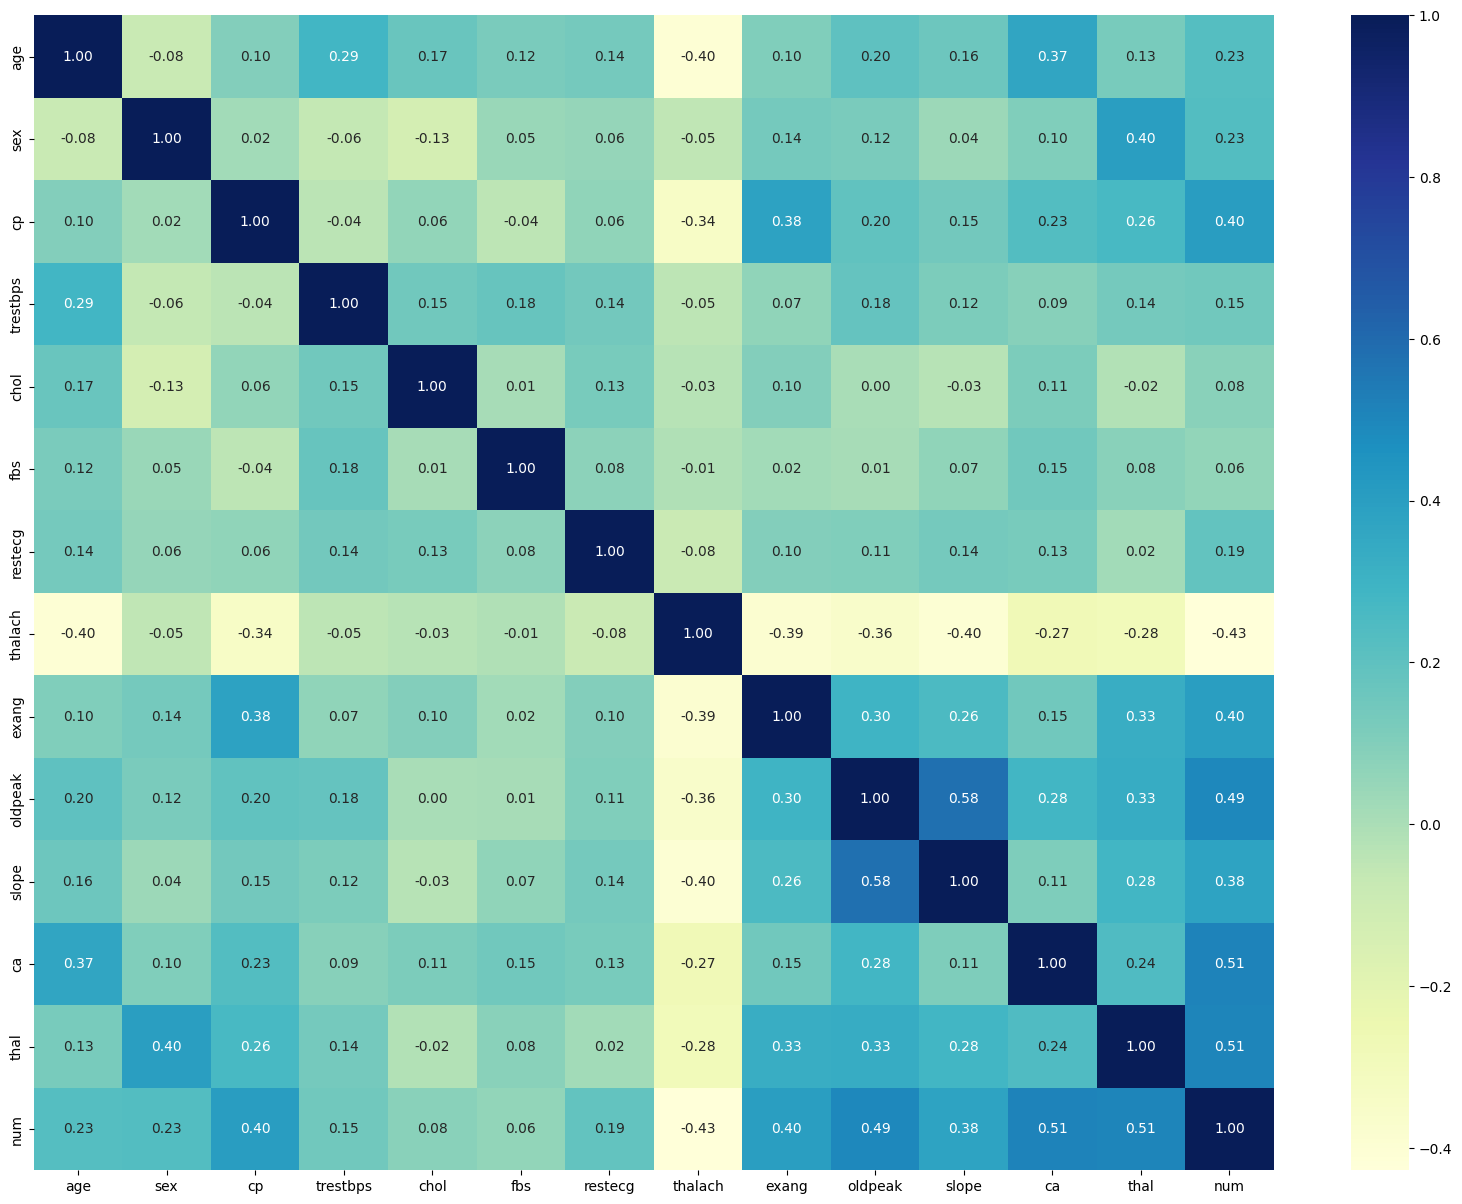

In [11]:
correlation_matrix= data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show()

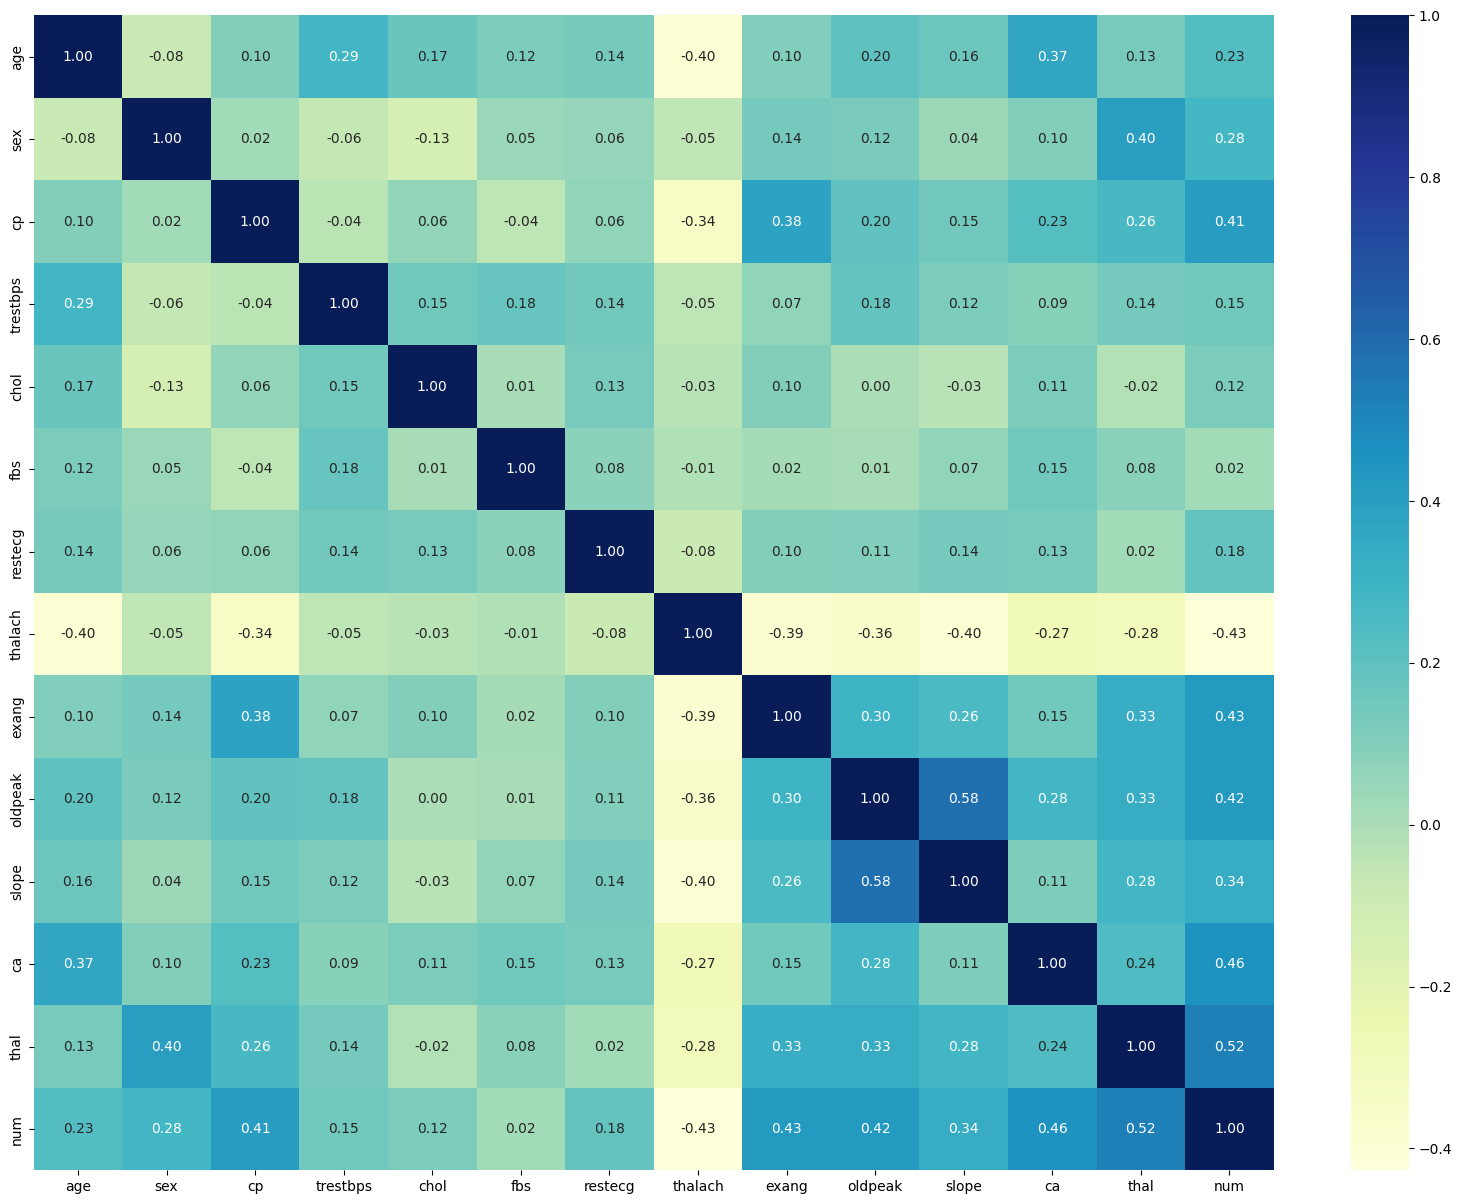

In [12]:
correlation_matrix= data_bin.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show()

То есть убирать какие-либо параметры не стоит (между параметрами слабая корреляция или умеренная).

In [13]:
X_multi = data.drop(columns=['num'])
y_multi = data['num']

In [14]:
X_multi_bin = data_bin.drop(columns=['num'])
y_multi_bin = data_bin['num']

In [15]:
y_multi.value_counts()

num
0    160
1     55
3     35
2     34
4     12
Name: count, dtype: int64

Распределение данных неравномерное!

In [16]:
y_multi_bin.value_counts()

num
0    160
1    136
Name: count, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_multi_bin, y_multi_bin, test_size=0.2, random_state=42)

In [18]:
y_test_bin.value_counts()

num
0    32
1    28
Name: count, dtype: int64

In [19]:
y_test.value_counts()

num
0    32
1    16
3     5
2     4
4     3
Name: count, dtype: int64

kNN

In [20]:
param_grid = {
    'kNN__n_neighbors': [1,3,5,7],
    'kNN__metric': ['euclidean', 'manhattan']
}

In [21]:
Input = [('kNN', KNeighborsClassifier())]

In [22]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('kNN', KNeighborsClassifier())])

In [23]:
grid_search = GridSearchCV(clone(pipe), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [24]:
oversample = SMOTE()
transformed_X_train, transformed_y_train = oversample.fit_resample(X_train, y_train)
transformed_y_train.value_counts()

num
2    128
0    128
1    128
3    128
4    128
Name: count, dtype: int64

In [25]:
oversample_bin = SMOTE()
transformed_X_train_bin, transformed_y_train_bin = oversample_bin.fit_resample(X_train_bin, y_train_bin)
transformed_y_train_bin.value_counts()

num
1    128
0    128
Name: count, dtype: int64

In [26]:
grid_search.fit(transformed_X_train, transformed_y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('kNN', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kNN__metric': ['euclidean', 'manhattan'],
                         'kNN__n_neighbors': [1, 3, 5, 7]},
             scoring='accuracy')

In [27]:
grid_search.best_params_

{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 1}

In [28]:
y_pred = grid_search.predict(X_test)

In [29]:
sk_learn_metrics_multi(y_test, y_pred)
self_made_metrics_multi(y_test, y_pred)

[0.53125 0.1875  0.      0.      0.     ]
[0.60714286 0.2        0.         0.         0.        ]
[0.70833333 0.21428571 0.         0.         0.        ]
[[17, 7, 4, 3, 1], [5, 3, 2, 3, 3], [1, 1, 0, 1, 1], [1, 1, 2, 0, 1], [0, 2, 0, 1, 0]]
accuracy: 0.3333333333333333
precision: {0: np.float64(0.7083333333333334), 1: np.float64(0.21428571428571427), 2: np.float64(0.0), 3: np.float64(0.0), 4: np.float64(0.0)}
recall: {0: np.float64(0.53125), 1: np.float64(0.1875), 2: np.float64(0.0), 3: np.float64(0.0), 4: np.float64(0.0)}
f1 score: {0: np.float64(0.6071428571428571), 1: np.float64(0.19999999999999998), 2: 0, 3: 0, 4: 0}


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.53      0.61        32
           1       0.21      0.19      0.20        16
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3

    accuracy                           0.33        60
   macro avg       0.18      0.14      0.16        60
weighted avg       0.43      0.33      0.38        60



In [31]:
confusion_matrix(y_test, y_pred)

array([[17,  7,  4,  3,  1],
       [ 5,  3,  2,  3,  3],
       [ 1,  1,  0,  1,  1],
       [ 1,  1,  2,  0,  1],
       [ 0,  2,  0,  1,  0]])

In [32]:
grid_search = GridSearchCV(clone(pipe), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [33]:
grid_search.fit(transformed_X_train_bin, transformed_y_train_bin)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('kNN', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kNN__metric': ['euclidean', 'manhattan'],
                         'kNN__n_neighbors': [1, 3, 5, 7]},
             scoring='accuracy')

In [34]:
grid_search.best_params_

{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 3}

In [35]:
y_pred_bin, y_pred_proba = grid_search.predict(X_test_bin), grid_search.predict_proba(X_test_bin)[:,1]

In [36]:
sk_learn_metrics_binary(y_test_bin, y_pred_bin)
self_made_metrics_binary(y_test_bin, y_pred_bin)

0.42857142857142855
0.47058823529411764
0.5217391304347826
[[21, 11], [16, 12]]
accuracy: 0.55
precision: 0.5217391304347826
recall: 0.42857142857142855
f1 score: 0.47058823529411764


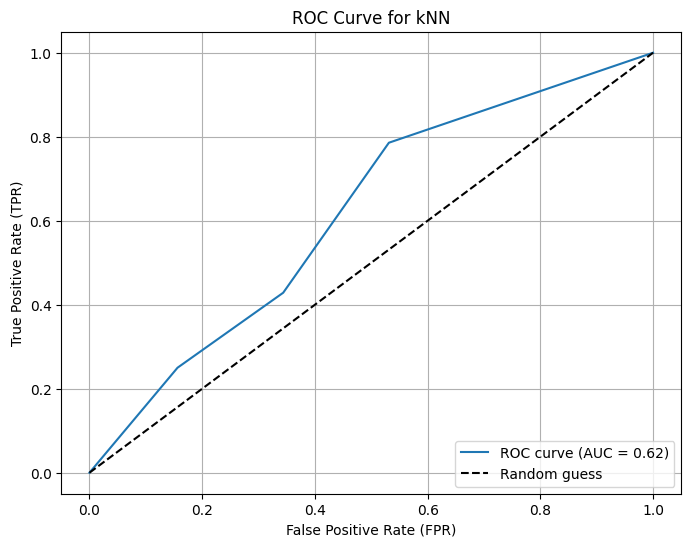

In [37]:
roc_curve_method(y_test_bin, y_pred_proba, name="kNN")

In [38]:
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.57      0.66      0.61        32
           1       0.52      0.43      0.47        28

    accuracy                           0.55        60
   macro avg       0.54      0.54      0.54        60
weighted avg       0.55      0.55      0.54        60



In [39]:
confusion_matrix(y_test_bin, y_pred_bin)

array([[21, 11],
       [16, 12]])

Теперь разделим данные с помощью stratify

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42, stratify=y_multi)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_multi_bin, y_multi_bin, test_size=0.2, random_state=42, stratify=y_multi_bin)

In [41]:
grid_search = GridSearchCV(clone(pipe), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [42]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('kNN', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kNN__metric': ['euclidean', 'manhattan'],
                         'kNN__n_neighbors': [1, 3, 5, 7]},
             scoring='accuracy')

In [43]:
y_pred = grid_search.predict(X_test)

In [44]:
sk_learn_metrics_multi(y_test, y_pred)
self_made_metrics_multi(y_test, y_pred)

[1.         0.09090909 0.         0.         0.        ]
[0.75294118 0.13333333 0.         0.         0.        ]
[0.60377358 0.25       0.         0.         0.        ]
[[32, 0, 0, 0, 0], [9, 1, 1, 0, 0], [6, 1, 0, 0, 0], [3, 2, 2, 0, 0], [3, 0, 0, 0, 0]]
accuracy: 0.55
precision: {0: np.float64(0.6037735849056604), 1: np.float64(0.25), 2: np.float64(0.0), 3: 0, 4: 0}
recall: {0: np.float64(1.0), 1: np.float64(0.09090909090909091), 2: np.float64(0.0), 3: np.float64(0.0), 4: np.float64(0.0)}
f1 score: {0: np.float64(0.7529411764705882), 1: np.float64(0.13333333333333333), 2: 0, 3: 0, 4: 0}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
grid_search.best_params_

{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 7}

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        32
           1       0.25      0.09      0.13        11
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.55        60
   macro avg       0.17      0.22      0.18        60
weighted avg       0.37      0.55      0.43        60



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
confusion_matrix(y_test, y_pred)

array([[32,  0,  0,  0,  0],
       [ 9,  1,  1,  0,  0],
       [ 6,  1,  0,  0,  0],
       [ 3,  2,  2,  0,  0],
       [ 3,  0,  0,  0,  0]])

In [48]:
grid_search = GridSearchCV(clone(pipe), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [49]:
grid_search.fit(X_train_bin, y_train_bin)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('kNN', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kNN__metric': ['euclidean', 'manhattan'],
                         'kNN__n_neighbors': [1, 3, 5, 7]},
             scoring='accuracy')

In [50]:
grid_search.best_params_

{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 7}

In [51]:
y_pred, y_pred_proba = grid_search.predict(X_test_bin), grid_search.predict_proba(X_test_bin)[:,1]

In [52]:
sk_learn_metrics_binary(y_test_bin, y_pred)
self_made_metrics_binary(y_test_bin, y_pred)

0.6071428571428571
0.6538461538461539
0.7083333333333334
[[25, 7], [11, 17]]
accuracy: 0.7
precision: 0.7083333333333334
recall: 0.6071428571428571
f1 score: 0.6538461538461539


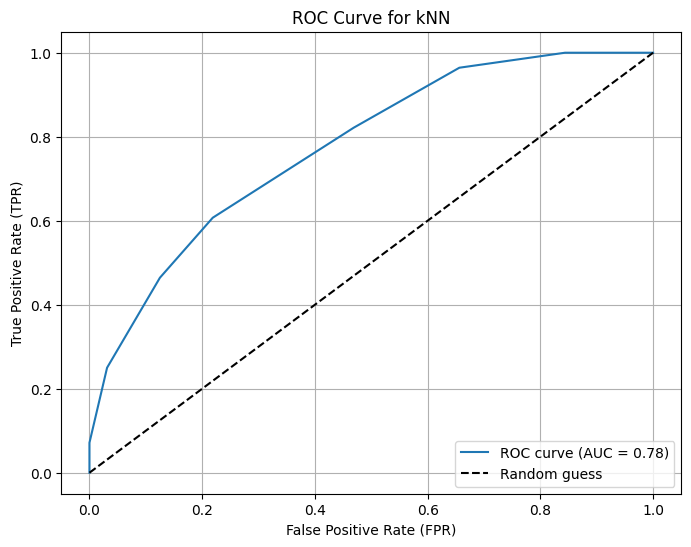

In [53]:
roc_curve_method(y_test_bin, y_pred_proba, name="kNN")

In [54]:
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.54      0.62      0.58        32
           1       0.48      0.39      0.43        28

    accuracy                           0.52        60
   macro avg       0.51      0.51      0.51        60
weighted avg       0.51      0.52      0.51        60



In [55]:
confusion_matrix(y_test_bin, y_pred_bin)

array([[20, 12],
       [17, 11]])

Теперь k-Fold

In [56]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [57]:
grid_search = GridSearchCV(clone(pipe), param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_multi, y_multi)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший скор на кросс-валидации:", grid_search.best_score_)

Лучшие параметры: {'kNN__metric': 'manhattan', 'kNN__n_neighbors': 5}
Лучший скор на кросс-валидации: 0.5270056497175141


In [58]:
y_pred = cross_val_predict(grid_search.best_estimator_, X_multi, y_multi, cv=kf)

In [59]:
sk_learn_metrics_multi(y_multi, y_pred)
self_made_metrics_multi(y_multi, y_pred)

[0.9        0.09090909 0.17647059 0.02857143 0.        ]
[0.73469388 0.10638298 0.23529412 0.04761905 0.        ]
[0.62068966 0.12820513 0.35294118 0.14285714 0.        ]
[[144, 13, 1, 2, 0], [43, 5, 5, 2, 0], [18, 8, 6, 2, 0], [21, 8, 4, 1, 1], [6, 5, 1, 0, 0]]
accuracy: 0.527027027027027
precision: {0: np.float64(0.6206896551724138), 1: np.float64(0.1282051282051282), 2: np.float64(0.35294117647058826), 3: np.float64(0.14285714285714285), 4: np.float64(0.0)}
recall: {0: np.float64(0.9), 1: np.float64(0.09090909090909091), 2: np.float64(0.17647058823529413), 3: np.float64(0.02857142857142857), 4: np.float64(0.0)}
f1 score: {0: np.float64(0.7346938775510204), 1: np.float64(0.10638297872340426), 2: np.float64(0.23529411764705885), 3: np.float64(0.04761904761904761), 4: 0}


In [60]:
print(classification_report(y_multi, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.90      0.73       160
           1       0.13      0.09      0.11        55
           2       0.35      0.18      0.24        34
           3       0.14      0.03      0.05        35
           4       0.00      0.00      0.00        12

    accuracy                           0.53       296
   macro avg       0.25      0.24      0.22       296
weighted avg       0.42      0.53      0.45       296



In [61]:
print(confusion_matrix(y_multi, y_pred))

[[144  13   1   2   0]
 [ 43   5   5   2   0]
 [ 18   8   6   2   0]
 [ 21   8   4   1   1]
 [  6   5   1   0   0]]


In [62]:
grid_search = GridSearchCV(clone(pipe), param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_multi_bin, y_multi_bin)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший скор на кросс-валидации:", grid_search.best_score_)

Лучшие параметры: {'kNN__metric': 'manhattan', 'kNN__n_neighbors': 5}
Лучший скор на кросс-валидации: 0.7227683615819209


In [63]:
y_pred, y_pred_proba = cross_val_predict(grid_search.best_estimator_, X_multi_bin, y_multi_bin, cv=kf), cross_val_predict(grid_search.best_estimator_, X_multi_bin, y_multi_bin, cv=kf, method='predict_proba')[:,1]

In [64]:
sk_learn_metrics_binary(y_multi_bin, y_pred)
self_made_metrics_binary(y_multi_bin, y_pred)

0.6323529411764706
0.6771653543307087
0.7288135593220338
[[128, 32], [50, 86]]
accuracy: 0.722972972972973
precision: 0.7288135593220338
recall: 0.6323529411764706
f1 score: 0.6771653543307087


In [65]:
print(classification_report(y_multi_bin, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       160
           1       0.73      0.63      0.68       136

    accuracy                           0.72       296
   macro avg       0.72      0.72      0.72       296
weighted avg       0.72      0.72      0.72       296



In [66]:
print(confusion_matrix(y_multi_bin, y_pred))

[[128  32]
 [ 50  86]]


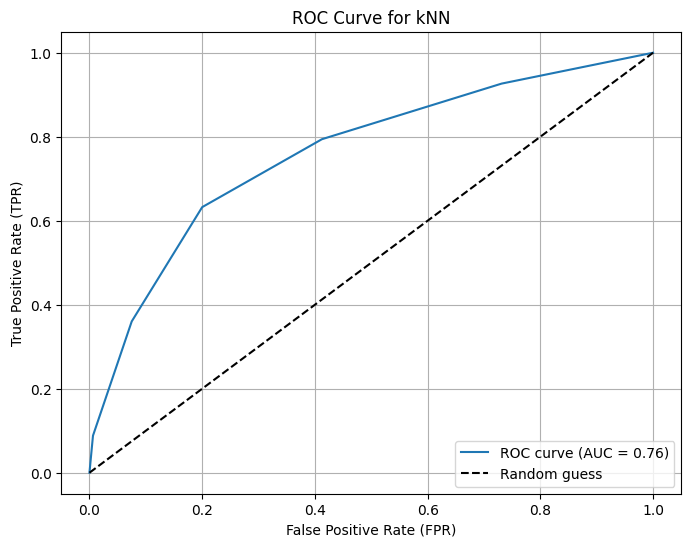

In [67]:
roc_curve_method(y_multi_bin, y_pred_proba, name="kNN")

Воспользуемся следующими алгоритмами (помимо обычного kNN)

Logistic Regression

Использование SMOTE

In [68]:
param_grid1 = {
    'logreg__C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'logreg__penalty': ['elasticnet'],
    'logreg__solver': ['saga'],  # Только saga поддерживает elasticnet
    'logreg__l1_ratio': [0.1, 0.5, 0.9],  # Баланс между L1 и L2
    'logreg__max_iter': [100, 500, 1000]
}

In [69]:
param_grid2 = {
    'logreg__C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'logreg__penalty': ['l1'],
    'logreg__solver': ['liblinear', 'saga'],  # liblinear и saga поддерживают l1
    'logreg__max_iter': [100, 500, 1000]
}

In [70]:
param_grid3 = {
    'logreg__C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'logreg__penalty': ['l2'],
    'logreg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],  # Все решатели поддерживают l2
    'logreg__max_iter': [100, 500, 1000]
}

In [71]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Шаг 1: Масштабирование данных
    ('logreg', LogisticRegression(random_state=42))  # Шаг 2: Логистическая регрессия
])

In [72]:
grid_search1 = GridSearchCV(clone(pipeline), param_grid1, cv=5, scoring='accuracy', n_jobs=-1)
grid_search2 = GridSearchCV(clone(pipeline), param_grid2, cv=5, scoring='accuracy', n_jobs=-1)
grid_search3 = GridSearchCV(clone(pipeline), param_grid3, cv=5, scoring='accuracy', n_jobs=-1)

In [73]:
grid_search1.fit(transformed_X_train, transformed_y_train);
grid_search2.fit(transformed_X_train, transformed_y_train);
grid_search3.fit(transformed_X_train, transformed_y_train);

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [74]:
y_pred1 = grid_search1.predict(X_test)
y_pred2 = grid_search2.predict(X_test)
y_pred3 = grid_search3.predict(X_test)

In [75]:
sk_learn_metrics_multi(y_test, y_pred1)
self_made_metrics_multi(y_test, y_pred1)
sk_learn_metrics_multi(y_test, y_pred2)
self_made_metrics_multi(y_test, y_pred2)
sk_learn_metrics_multi(y_test, y_pred3)
self_made_metrics_multi(y_test, y_pred3)

[0.6875     0.72727273 0.         0.71428571 0.33333333]
[0.78571429 0.55172414 0.         0.625      0.25      ]
[0.91666667 0.44444444 0.         0.55555556 0.2       ]
[[22, 7, 2, 0, 1], [2, 8, 1, 0, 0], [0, 2, 0, 3, 2], [0, 0, 1, 5, 1], [0, 1, 0, 1, 1]]
accuracy: 0.6
precision: {0: np.float64(0.9166666666666666), 1: np.float64(0.4444444444444444), 2: np.float64(0.0), 3: np.float64(0.5555555555555556), 4: np.float64(0.2)}
recall: {0: np.float64(0.6875), 1: np.float64(0.7272727272727273), 2: np.float64(0.0), 3: np.float64(0.7142857142857143), 4: np.float64(0.3333333333333333)}
f1 score: {0: np.float64(0.7857142857142857), 1: np.float64(0.5517241379310345), 2: 0, 3: np.float64(0.6250000000000001), 4: np.float64(0.25)}
[0.6875     0.72727273 0.         0.71428571 0.33333333]
[0.78571429 0.55172414 0.         0.625      0.25      ]
[0.91666667 0.44444444 0.         0.55555556 0.2       ]
[[22, 7, 2, 0, 1], [2, 8, 1, 0, 0], [0, 2, 0, 3, 2], [0, 0, 1, 5, 1], [0, 1, 0, 1, 1]]
accuracy: 0.6

In [76]:
print(classification_report(y_test, y_pred1))
print(classification_report(y_test, y_pred2))
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79        32
           1       0.44      0.73      0.55        11
           2       0.00      0.00      0.00         7
           3       0.56      0.71      0.62         7
           4       0.20      0.33      0.25         3

    accuracy                           0.60        60
   macro avg       0.42      0.49      0.44        60
weighted avg       0.65      0.60      0.61        60

              precision    recall  f1-score   support

           0       0.92      0.69      0.79        32
           1       0.44      0.73      0.55        11
           2       0.00      0.00      0.00         7
           3       0.56      0.71      0.62         7
           4       0.20      0.33      0.25         3

    accuracy                           0.60        60
   macro avg       0.42      0.49      0.44        60
weighted avg       0.65      0.60      0.61        60

              precisio

In [77]:
print(confusion_matrix(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred3))

[[22  7  2  0  1]
 [ 2  8  1  0  0]
 [ 0  2  0  3  2]
 [ 0  0  1  5  1]
 [ 0  1  0  1  1]]
[[22  7  2  0  1]
 [ 2  8  1  0  0]
 [ 0  2  0  3  2]
 [ 0  0  1  5  1]
 [ 0  1  0  1  1]]
[[22  7  2  0  1]
 [ 1  9  1  0  0]
 [ 0  2  0  3  2]
 [ 0  0  1  5  1]
 [ 0  1  0  1  1]]


In [78]:
print(grid_search1.best_params_)
print(grid_search2.best_params_)
print(grid_search3.best_params_)

{'logreg__C': 100.0, 'logreg__l1_ratio': 0.1, 'logreg__max_iter': 100, 'logreg__penalty': 'elasticnet', 'logreg__solver': 'saga'}
{'logreg__C': 100.0, 'logreg__max_iter': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}
{'logreg__C': 0.1, 'logreg__max_iter': 100, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}


In [79]:
grid_search1 = GridSearchCV(clone(pipeline), param_grid1, cv=5, scoring='accuracy', n_jobs=-1)
grid_search2 = GridSearchCV(clone(pipeline), param_grid2, cv=5, scoring='accuracy', n_jobs=-1)
grid_search3 = GridSearchCV(clone(pipeline), param_grid3, cv=5, scoring='accuracy', n_jobs=-1)

In [80]:
grid_search1.fit(transformed_X_train_bin, transformed_y_train_bin);
grid_search2.fit(transformed_X_train_bin, transformed_y_train_bin);
grid_search3.fit(transformed_X_train_bin, transformed_y_train_bin);

In [81]:
print(grid_search1.best_params_)
print(grid_search2.best_params_)
print(grid_search3.best_params_)

{'logreg__C': 0.1, 'logreg__l1_ratio': 0.1, 'logreg__max_iter': 100, 'logreg__penalty': 'elasticnet', 'logreg__solver': 'saga'}
{'logreg__C': 0.1, 'logreg__max_iter': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
{'logreg__C': 0.1, 'logreg__max_iter': 100, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}


In [82]:
y_pred1, y_pred1_proba = grid_search1.predict(X_test_bin),grid_search1.predict_proba(X_test_bin)[:,1]
y_pred2, y_pred2_proba  = grid_search2.predict(X_test_bin),grid_search2.predict_proba(X_test_bin)[:,1]
y_pred3, y_pred3_proba  = grid_search3.predict(X_test_bin),grid_search3.predict_proba(X_test_bin)[:,1]

In [83]:
sk_learn_metrics_binary(y_test_bin, y_pred1)
self_made_metrics_binary(y_test_bin, y_pred1)
sk_learn_metrics_binary(y_test_bin, y_pred2)
self_made_metrics_binary(y_test_bin, y_pred2)
sk_learn_metrics_binary(y_test_bin, y_pred3)
self_made_metrics_binary(y_test_bin, y_pred3)

0.9285714285714286
0.896551724137931
0.8666666666666667
[[28, 4], [2, 26]]
accuracy: 0.9
precision: 0.8666666666666667
recall: 0.9285714285714286
f1 score: 0.896551724137931
0.9285714285714286
0.9122807017543859
0.896551724137931
[[29, 3], [2, 26]]
accuracy: 0.9166666666666666
precision: 0.896551724137931
recall: 0.9285714285714286
f1 score: 0.912280701754386
0.9285714285714286
0.896551724137931
0.8666666666666667
[[28, 4], [2, 26]]
accuracy: 0.9
precision: 0.8666666666666667
recall: 0.9285714285714286
f1 score: 0.896551724137931


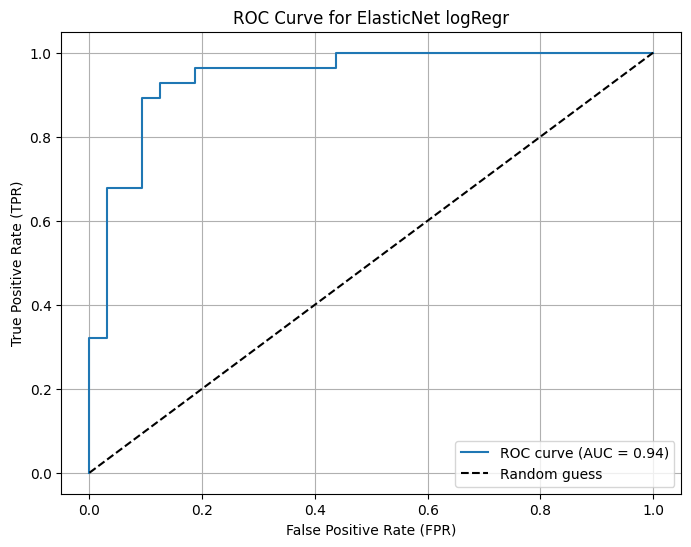

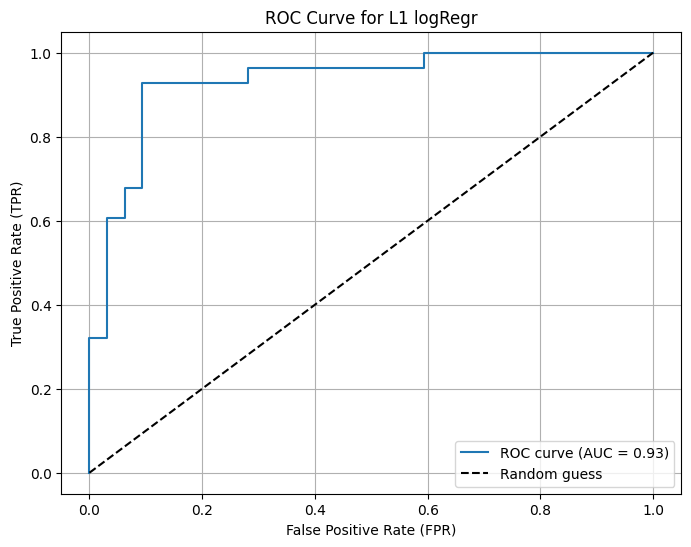

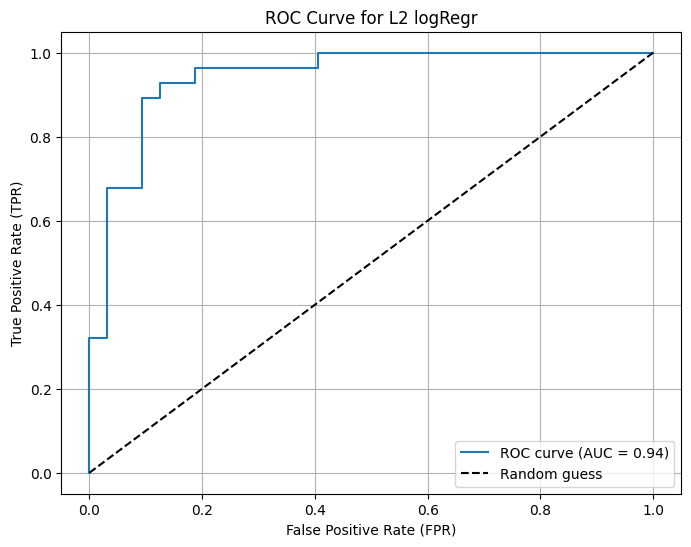

In [84]:
roc_curve_method(y_test_bin, y_pred1_proba, "ElasticNet logRegr")
roc_curve_method(y_test_bin, y_pred2_proba, "L1 logRegr")
roc_curve_method(y_test_bin, y_pred3_proba, "L2 logRegr")

In [85]:
print(classification_report(y_test_bin, y_pred1))
print(classification_report(y_test_bin, y_pred2))
print(classification_report(y_test_bin, y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.87      0.93      0.90        28

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.90      0.93      0.91        28

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.87      0.93      0.90        28

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [86]:
print(confusion_matrix(y_test_bin, y_pred1))
print(confusion_matrix(y_test_bin, y_pred2))
print(confusion_matrix(y_test_bin, y_pred3))

[[28  4]
 [ 2 26]]
[[29  3]
 [ 2 26]]
[[28  4]
 [ 2 26]]


In [87]:
print(grid_search1.best_params_)
print(grid_search2.best_params_)
print(grid_search3.best_params_)

{'logreg__C': 0.1, 'logreg__l1_ratio': 0.1, 'logreg__max_iter': 100, 'logreg__penalty': 'elasticnet', 'logreg__solver': 'saga'}
{'logreg__C': 0.1, 'logreg__max_iter': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
{'logreg__C': 0.1, 'logreg__max_iter': 100, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}


Теперь с использованием стратификации

In [88]:
grid_search1 = GridSearchCV(clone(pipeline), param_grid1, cv=5, scoring='accuracy', n_jobs=-1)
grid_search2 = GridSearchCV(clone(pipeline), param_grid2, cv=5, scoring='accuracy', n_jobs=-1)
grid_search3 = GridSearchCV(clone(pipeline), param_grid3, cv=5, scoring='accuracy', n_jobs=-1)

In [89]:
grid_search1.fit(X_train, y_train);
grid_search2.fit(X_train, y_train);
grid_search3.fit(X_train, y_train);

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [90]:
y_pred1 = grid_search1.predict(X_test)
y_pred2 = grid_search2.predict(X_test)
y_pred3 = grid_search3.predict(X_test)

In [91]:
sk_learn_metrics_multi(y_test, y_pred1)
self_made_metrics_multi(y_test, y_pred1)
sk_learn_metrics_multi(y_test, y_pred2)
self_made_metrics_multi(y_test, y_pred2)
sk_learn_metrics_multi(y_test, y_pred3)
self_made_metrics_multi(y_test, y_pred3)

[0.90625    0.36363636 0.         0.42857143 0.        ]
[0.84057971 0.38095238 0.         0.46153846 0.        ]
[0.78378378 0.4        0.         0.5        0.        ]
[[29, 1, 2, 0, 0], [6, 4, 1, 0, 0], [2, 3, 0, 2, 0], [0, 0, 4, 3, 0], [0, 2, 0, 1, 0]]
accuracy: 0.6
precision: {0: np.float64(0.7837837837837838), 1: np.float64(0.4), 2: np.float64(0.0), 3: np.float64(0.5), 4: 0}
recall: {0: np.float64(0.90625), 1: np.float64(0.36363636363636365), 2: np.float64(0.0), 3: np.float64(0.42857142857142855), 4: np.float64(0.0)}
f1 score: {0: np.float64(0.8405797101449275), 1: np.float64(0.380952380952381), 2: 0, 3: np.float64(0.4615384615384615), 4: 0}
[0.90625    0.36363636 0.         0.42857143 0.        ]
[0.84057971 0.38095238 0.         0.46153846 0.        ]
[0.78378378 0.4        0.         0.5        0.        ]
[[29, 1, 1, 0, 1], [6, 4, 1, 0, 0], [2, 3, 0, 2, 0], [0, 0, 3, 3, 1], [0, 2, 0, 1, 0]]
accuracy: 0.6
precision: {0: np.float64(0.7837837837837838), 1: np.float64(0.4), 2: n

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [92]:
print(classification_report(y_test, y_pred1))
print(classification_report(y_test, y_pred2))
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        32
           1       0.40      0.36      0.38        11
           2       0.00      0.00      0.00         7
           3       0.50      0.43      0.46         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.34      0.34      0.34        60
weighted avg       0.55      0.60      0.57        60

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        32
           1       0.40      0.36      0.38        11
           2       0.00      0.00      0.00         7
           3       0.50      0.43      0.46         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.34      0.34      0.34        60
weighted avg       0.55      0.60      0.57        60

              precisio

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [93]:
print(confusion_matrix(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred3))

[[29  1  2  0  0]
 [ 6  4  1  0  0]
 [ 2  3  0  2  0]
 [ 0  0  4  3  0]
 [ 0  2  0  1  0]]
[[29  1  1  0  1]
 [ 6  4  1  0  0]
 [ 2  3  0  2  0]
 [ 0  0  3  3  1]
 [ 0  2  0  1  0]]
[[29  1  2  0  0]
 [ 5  2  1  3  0]
 [ 1  1  0  5  0]
 [ 0  0  4  3  0]
 [ 0  1  0  2  0]]


In [94]:
print(grid_search1.best_params_)
print(grid_search2.best_params_)
print(grid_search3.best_params_)

{'logreg__C': 0.1, 'logreg__l1_ratio': 0.1, 'logreg__max_iter': 100, 'logreg__penalty': 'elasticnet', 'logreg__solver': 'saga'}
{'logreg__C': 1.0, 'logreg__max_iter': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}
{'logreg__C': 0.01, 'logreg__max_iter': 100, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}


In [95]:
grid_search1 = GridSearchCV(clone(pipeline), param_grid1, cv=5, scoring='accuracy', n_jobs=-1)
grid_search2 = GridSearchCV(clone(pipeline), param_grid2, cv=5, scoring='accuracy', n_jobs=-1)
grid_search3 = GridSearchCV(clone(pipeline), param_grid3, cv=5, scoring='accuracy', n_jobs=-1)

In [96]:
grid_search1.fit(X_train_bin, y_train_bin);
grid_search2.fit(X_train_bin, y_train_bin);
grid_search3.fit(X_train_bin, y_train_bin);

In [97]:
y_pred1, y_pred1_proba = grid_search1.predict(X_test_bin),grid_search1.predict_proba(X_test_bin)[:,1]
y_pred2, y_pred2_proba  = grid_search2.predict(X_test_bin),grid_search2.predict_proba(X_test_bin)[:,1]
y_pred3, y_pred3_proba  = grid_search3.predict(X_test_bin),grid_search3.predict_proba(X_test_bin)[:,1]

In [98]:
sk_learn_metrics_binary(y_test_bin, y_pred1)
self_made_metrics_binary(y_test_bin, y_pred1)
sk_learn_metrics_binary(y_test_bin, y_pred2)
self_made_metrics_binary(y_test_bin, y_pred2)
sk_learn_metrics_binary(y_test_bin, y_pred3)
self_made_metrics_binary(y_test_bin, y_pred3)

0.9285714285714286
0.8666666666666667
0.8125
[[26, 6], [2, 26]]
accuracy: 0.8666666666666667
precision: 0.8125
recall: 0.9285714285714286
f1 score: 0.8666666666666666
0.9285714285714286
0.8666666666666667
0.8125
[[26, 6], [2, 26]]
accuracy: 0.8666666666666667
precision: 0.8125
recall: 0.9285714285714286
f1 score: 0.8666666666666666
0.9285714285714286
0.8666666666666667
0.8125
[[26, 6], [2, 26]]
accuracy: 0.8666666666666667
precision: 0.8125
recall: 0.9285714285714286
f1 score: 0.8666666666666666


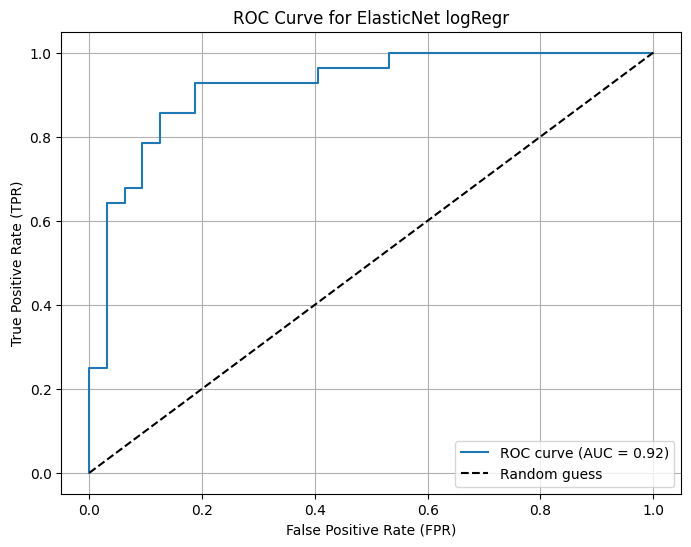

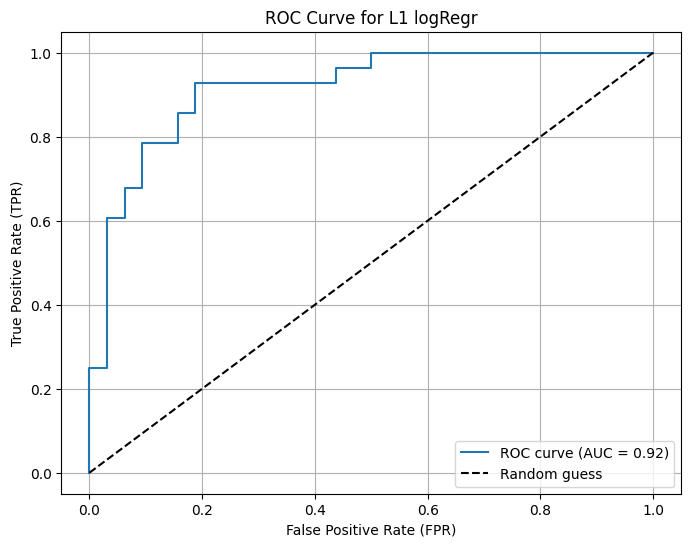

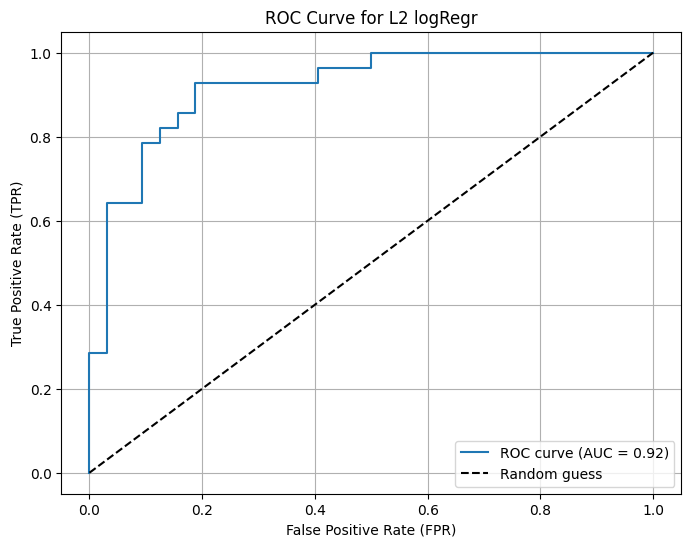

In [99]:
roc_curve_method(y_test_bin, y_pred1_proba, "ElasticNet logRegr")
roc_curve_method(y_test_bin, y_pred2_proba, "L1 logRegr")
roc_curve_method(y_test_bin, y_pred3_proba, "L2 logRegr")

In [100]:
print(classification_report(y_test_bin, y_pred1))
print(classification_report(y_test_bin, y_pred2))
print(classification_report(y_test_bin, y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.81      0.93      0.87        28

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.81      0.93      0.87        28

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.81      0.93      0.87        28

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [101]:
print(confusion_matrix(y_test_bin, y_pred1))
print(confusion_matrix(y_test_bin, y_pred2))
print(confusion_matrix(y_test_bin, y_pred3))

[[26  6]
 [ 2 26]]
[[26  6]
 [ 2 26]]
[[26  6]
 [ 2 26]]


In [102]:
print(grid_search1.best_params_)
print(grid_search2.best_params_)
print(grid_search3.best_params_)

{'logreg__C': 1.0, 'logreg__l1_ratio': 0.5, 'logreg__max_iter': 100, 'logreg__penalty': 'elasticnet', 'logreg__solver': 'saga'}
{'logreg__C': 10.0, 'logreg__max_iter': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
{'logreg__C': 1.0, 'logreg__max_iter': 100, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}


Теперь Kfold

In [103]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [104]:
grid_search1 = GridSearchCV(clone(pipeline), param_grid1, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search2 = GridSearchCV(clone(pipeline), param_grid2, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search3 = GridSearchCV(clone(pipeline), param_grid3, cv=kf, scoring='accuracy', n_jobs=-1)

In [105]:
grid_search1.fit(X_multi, y_multi)
grid_search2.fit(X_multi, y_multi)
grid_search3.fit(X_multi, y_multi)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'logreg__max_iter': [100, 500, 1000],
                         'logreg__penalty': ['l2'],
                         'logreg__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                            'sag', 'saga']},
             scoring='accuracy')

In [106]:
print("Лучшие параметры:", grid_search1.best_params_)
print("Лучший скор на кросс-валидации:", grid_search1.best_score_)
print("Лучшие параметры:", grid_search2.best_params_)
print("Лучший скор на кросс-валидации:", grid_search2.best_score_)
print("Лучшие параметры:", grid_search3.best_params_)
print("Лучший скор на кросс-валидации:", grid_search3.best_score_)

Лучшие параметры: {'logreg__C': 1.0, 'logreg__l1_ratio': 0.5, 'logreg__max_iter': 100, 'logreg__penalty': 'elasticnet', 'logreg__solver': 'saga'}
Лучший скор на кросс-валидации: 0.6011299435028248
Лучшие параметры: {'logreg__C': 1.0, 'logreg__max_iter': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}
Лучший скор на кросс-валидации: 0.6045197740112994
Лучшие параметры: {'logreg__C': 0.01, 'logreg__max_iter': 100, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Лучший скор на кросс-валидации: 0.6045197740112994


In [107]:
y_pred1 = cross_val_predict(grid_search1.best_estimator_, X_multi, y_multi, cv=kf)
y_pred2 = cross_val_predict(grid_search2.best_estimator_, X_multi, y_multi, cv=kf)
y_pred3 = cross_val_predict(grid_search3.best_estimator_, X_multi, y_multi, cv=kf)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

In [108]:
sk_learn_metrics_multi(y_multi, y_pred1)
self_made_metrics_multi(y_multi, y_pred1)
sk_learn_metrics_multi(y_multi, y_pred2)
self_made_metrics_multi(y_multi, y_pred2)
sk_learn_metrics_multi(y_multi, y_pred3)
self_made_metrics_multi(y_multi, y_pred3)

[0.90625    0.23636364 0.23529412 0.34285714 0.        ]
[0.85043988 0.25242718 0.25396825 0.35294118 0.        ]
[0.80110497 0.27083333 0.27586207 0.36363636 0.        ]
[[145, 10, 3, 0, 2], [28, 13, 6, 8, 0], [5, 11, 8, 9, 1], [2, 9, 10, 12, 2], [1, 5, 2, 4, 0]]
accuracy: 0.6013513513513513
precision: {0: np.float64(0.8011049723756906), 1: np.float64(0.2708333333333333), 2: np.float64(0.27586206896551724), 3: np.float64(0.36363636363636365), 4: np.float64(0.0)}
recall: {0: np.float64(0.90625), 1: np.float64(0.23636363636363636), 2: np.float64(0.23529411764705882), 3: np.float64(0.34285714285714286), 4: np.float64(0.0)}
f1 score: {0: np.float64(0.8504398826979471), 1: np.float64(0.2524271844660194), 2: np.float64(0.253968253968254), 3: np.float64(0.3529411764705882), 4: 0}
[0.91875    0.25454545 0.20588235 0.31428571 0.        ]
[0.85465116 0.26923077 0.24137931 0.32352941 0.        ]
[0.79891304 0.28571429 0.29166667 0.33333333 0.        ]
[[147, 9, 2, 0, 2], [28, 14, 5, 8, 0], [6, 1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [109]:
print(classification_report(y_multi, y_pred1))
print(classification_report(y_multi, y_pred2))
print(classification_report(y_multi, y_pred3))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       160
           1       0.27      0.24      0.25        55
           2       0.28      0.24      0.25        34
           3       0.36      0.34      0.35        35
           4       0.00      0.00      0.00        12

    accuracy                           0.60       296
   macro avg       0.34      0.34      0.34       296
weighted avg       0.56      0.60      0.58       296

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       160
           1       0.29      0.25      0.27        55
           2       0.29      0.21      0.24        34
           3       0.33      0.31      0.32        35
           4       0.00      0.00      0.00        12

    accuracy                           0.60       296
   macro avg       0.34      0.34      0.34       296
weighted avg       0.56      0.60      0.58       296

              precisio

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [110]:
print(confusion_matrix(y_multi, y_pred1))
print(confusion_matrix(y_multi, y_pred2))
print(confusion_matrix(y_multi, y_pred3))

[[145  10   3   0   2]
 [ 28  13   6   8   0]
 [  5  11   8   9   1]
 [  2   9  10  12   2]
 [  1   5   2   4   0]]
[[147   9   2   0   2]
 [ 28  14   5   8   0]
 [  6  12   7   8   1]
 [  2  10   9  11   3]
 [  1   4   1   6   0]]
[[151   4   4   1   0]
 [ 30   8   3  14   0]
 [  6   4   2  22   0]
 [  3   6   8  18   0]
 [  1   3   0   8   0]]


In [111]:
grid_search1 = GridSearchCV(clone(pipeline), param_grid1, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search2 = GridSearchCV(clone(pipeline), param_grid2, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search3 = GridSearchCV(clone(pipeline), param_grid3, cv=kf, scoring='accuracy', n_jobs=-1)

In [112]:
grid_search1.fit(X_multi_bin, y_multi_bin)
grid_search2.fit(X_multi_bin, y_multi_bin)
grid_search3.fit(X_multi_bin, y_multi_bin)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'logreg__max_iter': [100, 500, 1000],
                         'logreg__penalty': ['l2'],
                         'logreg__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                            'sag', 'saga']},
             scoring='accuracy')

In [113]:
print("Лучшие параметры:", grid_search1.best_params_)
print("Лучший скор на кросс-валидации:", grid_search1.best_score_)
print("Лучшие параметры:", grid_search2.best_params_)
print("Лучший скор на кросс-валидации:", grid_search2.best_score_)
print("Лучшие параметры:", grid_search3.best_params_)
print("Лучший скор на кросс-валидации:", grid_search3.best_score_)

Лучшие параметры: {'logreg__C': 0.01, 'logreg__l1_ratio': 0.1, 'logreg__max_iter': 100, 'logreg__penalty': 'elasticnet', 'logreg__solver': 'saga'}
Лучший скор на кросс-валидации: 0.8544632768361582
Лучшие параметры: {'logreg__C': 0.1, 'logreg__max_iter': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}
Лучший скор на кросс-валидации: 0.84090395480226
Лучшие параметры: {'logreg__C': 1.0, 'logreg__max_iter': 100, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Лучший скор на кросс-валидации: 0.8442937853107345


In [114]:
y_pred1, y_pred1_proba = cross_val_predict(grid_search1.best_estimator_, X_multi_bin, y_multi_bin, cv=kf), cross_val_predict(grid_search1.best_estimator_, X_multi_bin, y_multi_bin, cv=kf, method='predict_proba')[:,1]
y_pred2, y_pred2_proba = cross_val_predict(grid_search2.best_estimator_, X_multi_bin, y_multi_bin, cv=kf), cross_val_predict(grid_search2.best_estimator_, X_multi_bin, y_multi_bin, cv=kf, method='predict_proba')[:,1]
y_pred3, y_pred3_proba = cross_val_predict(grid_search3.best_estimator_, X_multi_bin, y_multi_bin, cv=kf), cross_val_predict(grid_search3.best_estimator_, X_multi_bin, y_multi_bin, cv=kf, method='predict_proba')[:,1]

In [115]:
sk_learn_metrics_binary(y_multi_bin, y_pred1)
self_made_metrics_binary(y_multi_bin, y_pred1)
sk_learn_metrics_binary(y_multi_bin, y_pred2)
self_made_metrics_binary(y_multi_bin, y_pred2)
sk_learn_metrics_binary(y_multi_bin, y_pred3)
self_made_metrics_binary(y_multi_bin, y_pred3)

0.7720588235294118
0.8300395256916996
0.8974358974358975
[[148, 12], [31, 105]]
accuracy: 0.8547297297297297
precision: 0.8974358974358975
recall: 0.7720588235294118
f1 score: 0.8300395256916997
0.7941176470588235
0.8212927756653993
0.8503937007874016
[[141, 19], [28, 108]]
accuracy: 0.8412162162162162
precision: 0.8503937007874016
recall: 0.7941176470588235
f1 score: 0.8212927756653992
0.8014705882352942
0.8257575757575758
0.8515625
[[141, 19], [27, 109]]
accuracy: 0.8445945945945946
precision: 0.8515625
recall: 0.8014705882352942
f1 score: 0.8257575757575757


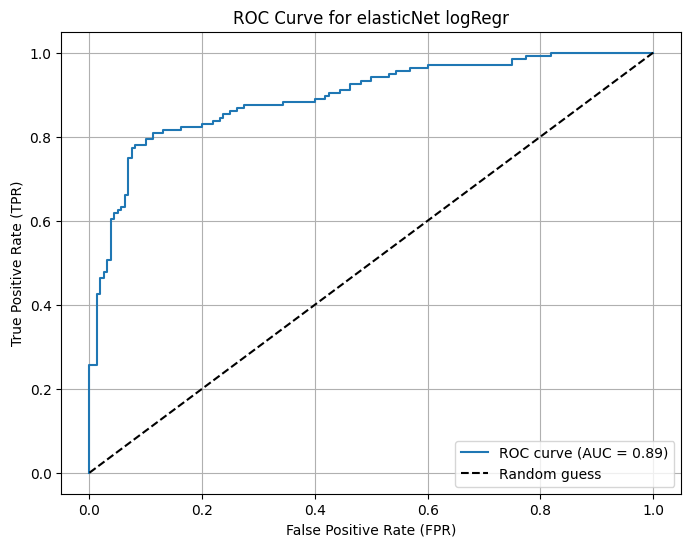

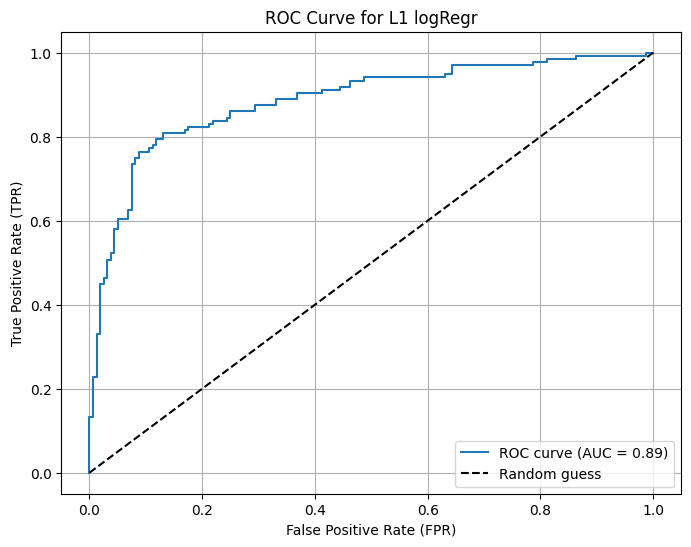

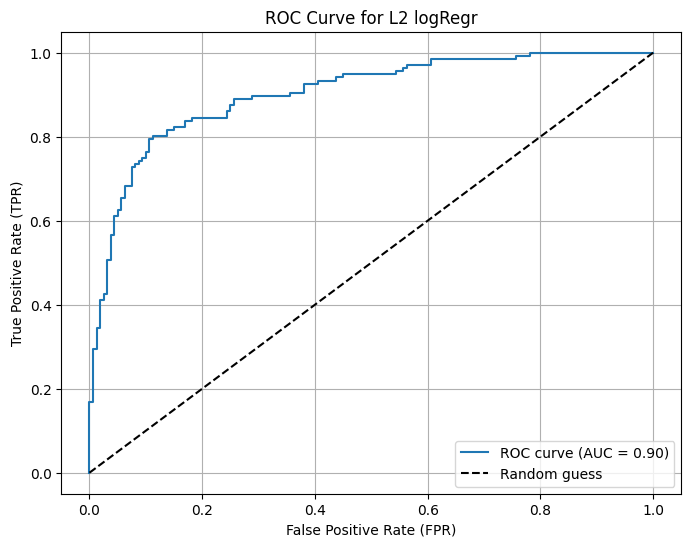

In [116]:
roc_curve_method(y_multi_bin, y_pred1_proba, "elasticNet logRegr")
roc_curve_method(y_multi_bin, y_pred2_proba, "L1 logRegr")
roc_curve_method(y_multi_bin, y_pred3_proba, "L2 logRegr")

In [117]:
print(classification_report(y_multi_bin, y_pred1))
print(classification_report(y_multi_bin, y_pred2))
print(classification_report(y_multi_bin, y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       160
           1       0.90      0.77      0.83       136

    accuracy                           0.85       296
   macro avg       0.86      0.85      0.85       296
weighted avg       0.86      0.85      0.85       296

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       160
           1       0.85      0.79      0.82       136

    accuracy                           0.84       296
   macro avg       0.84      0.84      0.84       296
weighted avg       0.84      0.84      0.84       296

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       160
           1       0.85      0.80      0.83       136

    accuracy                           0.84       296
   macro avg       0.85      0.84      0.84       296
weighted avg       0.84      0.84      0.84       296



In [118]:
print(confusion_matrix(y_multi_bin, y_pred1))
print(confusion_matrix(y_multi_bin, y_pred2))
print(confusion_matrix(y_multi_bin, y_pred3))

[[148  12]
 [ 31 105]]
[[141  19]
 [ 28 108]]
[[141  19]
 [ 27 109]]


Naive Bayes (все его вариации)

In [119]:
param_grid_gaussian = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

In [120]:
param_grid_multinomial = {
    'classifier__alpha': [0.1, 0.5, 1.0, 2.0],
    'classifier__fit_prior': [True, False]
}

In [121]:
param_grid_bernoulli = {
    'classifier__alpha': [0.1, 0.5, 1.0, 2.0],
    'classifier__fit_prior': [True, False],
}

In [122]:
# Пайплайн для GaussianNB
pipeline_gaussian = Pipeline([
    ('classifier', GaussianNB())   # Модель
])

# Пайплайн для MultinomialNB
pipeline_multinomial = Pipeline([
    ('classifier', MultinomialNB())
])

# Пайплайн для BernoulliNB (используем только в связке с бинарными данными*)
pipeline_bernoulli = Pipeline([
    ('classifier', BernoulliNB())
])

SMOTE

In [123]:
grid_search1 = GridSearchCV(clone(pipeline_gaussian), param_grid_gaussian, cv=5, scoring='accuracy')
grid_search2 = GridSearchCV(clone(pipeline_multinomial), param_grid_multinomial, cv=5, scoring='accuracy')

In [124]:
grid_search1.fit(transformed_X_train, transformed_y_train);
grid_search2.fit(transformed_X_train, transformed_y_train);

In [125]:
y_pred1 = grid_search1.predict(X_test)
y_pred2 = grid_search2.predict(X_test)

In [126]:
sk_learn_metrics_multi(y_test, y_pred1)
self_made_metrics_multi(y_test, y_pred1)
sk_learn_metrics_multi(y_test, y_pred2)
self_made_metrics_multi(y_test, y_pred2)

[0.59375    0.54545455 0.14285714 0.14285714 1.        ]
[0.73076923 0.42857143 0.22222222 0.16666667 0.31578947]
[0.95       0.35294118 0.5        0.2        0.1875    ]
[[19, 9, 0, 0, 4], [1, 6, 0, 2, 2], [0, 2, 1, 2, 2], [0, 0, 1, 1, 5], [0, 0, 0, 0, 3]]
accuracy: 0.5
precision: {0: np.float64(0.95), 1: np.float64(0.35294117647058826), 2: np.float64(0.5), 3: np.float64(0.2), 4: np.float64(0.1875)}
recall: {0: np.float64(0.59375), 1: np.float64(0.5454545454545454), 2: np.float64(0.14285714285714285), 3: np.float64(0.14285714285714285), 4: np.float64(1.0)}
f1 score: {0: np.float64(0.7307692307692308), 1: np.float64(0.42857142857142855), 2: np.float64(0.22222222222222224), 3: np.float64(0.16666666666666666), 4: np.float64(0.3157894736842105)}
[0.65625    0.63636364 0.         0.14285714 0.66666667]
[0.75       0.60869565 0.         0.16666667 0.33333333]
[0.875      0.58333333 0.         0.2        0.22222222]
[[21, 5, 3, 1, 2], [1, 7, 3, 0, 0], [2, 0, 0, 3, 2], [0, 0, 3, 1, 3], [0, 0,

In [127]:
print("Лучшие параметры:", grid_search1.best_params_)
print("Лучшие параметры:", grid_search2.best_params_)

Лучшие параметры: {'classifier__var_smoothing': 1e-06}
Лучшие параметры: {'classifier__alpha': 0.1, 'classifier__fit_prior': True}


In [128]:
print(classification_report(y_test, y_pred1))
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.59      0.73        32
           1       0.35      0.55      0.43        11
           2       0.50      0.14      0.22         7
           3       0.20      0.14      0.17         7
           4       0.19      1.00      0.32         3

    accuracy                           0.50        60
   macro avg       0.44      0.48      0.37        60
weighted avg       0.66      0.50      0.53        60

              precision    recall  f1-score   support

           0       0.88      0.66      0.75        32
           1       0.58      0.64      0.61        11
           2       0.00      0.00      0.00         7
           3       0.20      0.14      0.17         7
           4       0.22      0.67      0.33         3

    accuracy                           0.52        60
   macro avg       0.38      0.42      0.37        60
weighted avg       0.61      0.52      0.55        60



In [129]:
print(confusion_matrix(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred2))

[[19  9  0  0  4]
 [ 1  6  0  2  2]
 [ 0  2  1  2  2]
 [ 0  0  1  1  5]
 [ 0  0  0  0  3]]
[[21  5  3  1  2]
 [ 1  7  3  0  0]
 [ 2  0  0  3  2]
 [ 0  0  3  1  3]
 [ 0  0  1  0  2]]


In [130]:
print(grid_search1.best_params_)
print(grid_search2.best_params_)

{'classifier__var_smoothing': 1e-06}
{'classifier__alpha': 0.1, 'classifier__fit_prior': True}


In [131]:
grid_search1 = GridSearchCV(clone(pipeline_gaussian), param_grid_gaussian, cv=5, scoring='accuracy')
grid_search2 = GridSearchCV(clone(pipeline_multinomial), param_grid_multinomial, cv=5, scoring='accuracy')
grid_search3 = GridSearchCV(clone(pipeline_bernoulli), param_grid_bernoulli, cv=5, scoring='accuracy')

In [132]:
grid_search1.fit(transformed_X_train_bin, transformed_y_train_bin);
grid_search2.fit(transformed_X_train_bin, transformed_y_train_bin);
grid_search3.fit(transformed_X_train_bin, transformed_y_train_bin);

In [133]:
print(grid_search1.best_params_)
print(grid_search2.best_params_)
print(grid_search3.best_params_)

{'classifier__var_smoothing': 1e-09}
{'classifier__alpha': 0.5, 'classifier__fit_prior': True}
{'classifier__alpha': 0.5, 'classifier__fit_prior': False}


In [134]:
y_pred1, y_pred1_proba = grid_search1.predict(X_test_bin), grid_search1.predict_proba(X_test_bin)[:,1]
y_pred2, y_pred2_proba = grid_search2.predict(X_test_bin), grid_search2.predict_proba(X_test_bin)[:,1]
y_pred3, y_pred3_proba = grid_search3.predict(X_test_bin), grid_search3.predict_proba(X_test_bin)[:,1]

In [135]:
sk_learn_metrics_binary(y_test_bin, y_pred1)
self_made_metrics_binary(y_test_bin, y_pred1)
sk_learn_metrics_binary(y_test_bin, y_pred2)
self_made_metrics_binary(y_test_bin, y_pred2)
sk_learn_metrics_binary(y_test_bin, y_pred3)
self_made_metrics_binary(y_test_bin, y_pred3)

0.8928571428571429
0.847457627118644
0.8064516129032258
[[26, 6], [3, 25]]
accuracy: 0.85
precision: 0.8064516129032258
recall: 0.8928571428571429
f1 score: 0.8474576271186439
0.8214285714285714
0.7931034482758621
0.7666666666666667
[[25, 7], [5, 23]]
accuracy: 0.8
precision: 0.7666666666666667
recall: 0.8214285714285714
f1 score: 0.793103448275862
0.8571428571428571
0.8421052631578947
0.8275862068965517
[[27, 5], [4, 24]]
accuracy: 0.85
precision: 0.8275862068965517
recall: 0.8571428571428571
f1 score: 0.8421052631578947


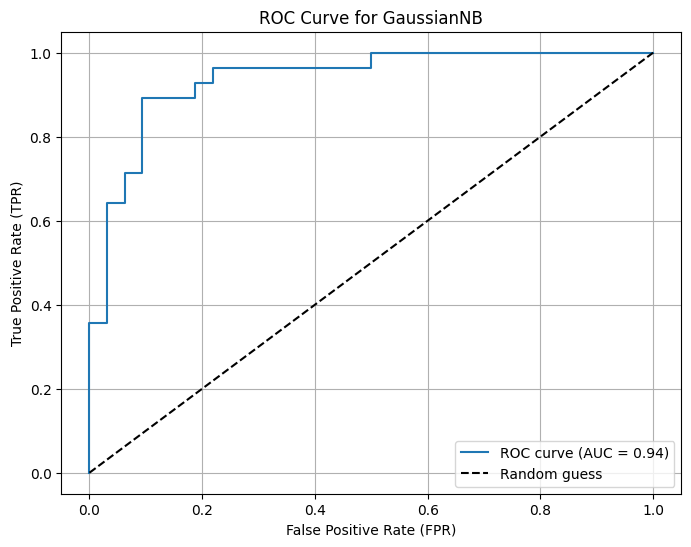

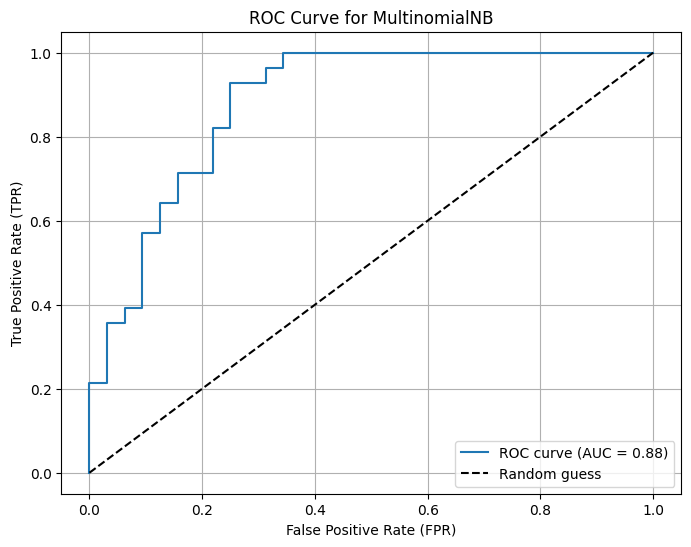

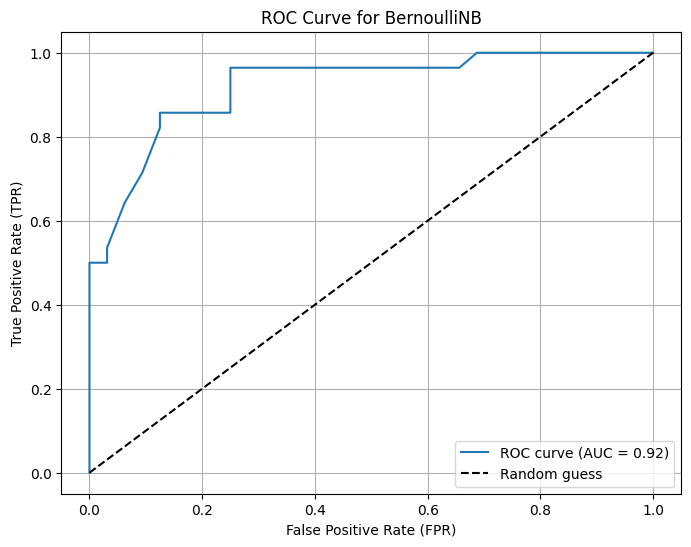

In [136]:
roc_curve_method(y_test_bin, y_pred1_proba, "GaussianNB")
roc_curve_method(y_test_bin, y_pred2_proba, "MultinomialNB")
roc_curve_method(y_test_bin, y_pred3_proba, "BernoulliNB")

In [137]:
print(classification_report(y_test_bin, y_pred1))
print(classification_report(y_test_bin, y_pred2))
print(classification_report(y_test_bin, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.81      0.89      0.85        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        32
           1       0.77      0.82      0.79        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.83      0.86      0.84        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [138]:
print(confusion_matrix(y_test_bin, y_pred1))
print(confusion_matrix(y_test_bin, y_pred2))
print(confusion_matrix(y_test_bin, y_pred3))

[[26  6]
 [ 3 25]]
[[25  7]
 [ 5 23]]
[[27  5]
 [ 4 24]]


In [139]:
print(grid_search1.best_params_)
print(grid_search2.best_params_)
print(grid_search3.best_params_)

{'classifier__var_smoothing': 1e-09}
{'classifier__alpha': 0.5, 'classifier__fit_prior': True}
{'classifier__alpha': 0.5, 'classifier__fit_prior': False}


STRATIFY

In [140]:
grid_search1 = GridSearchCV(clone(pipeline_gaussian), param_grid_gaussian, cv=5, scoring='accuracy')
grid_search2 = GridSearchCV(clone(pipeline_multinomial), param_grid_multinomial, cv=5, scoring='accuracy')

In [141]:
grid_search1.fit(X_train, y_train);
grid_search2.fit(X_train, y_train);

In [142]:
y_pred1 = grid_search1.predict(X_test)
y_pred2 = grid_search2.predict(X_test)

In [143]:
sk_learn_metrics_multi(y_test, y_pred1)
self_made_metrics_multi(y_test, y_pred1)
sk_learn_metrics_multi(y_test, y_pred2)
self_made_metrics_multi(y_test, y_pred2)

[0.78125    0.27272727 0.         0.14285714 0.33333333]
[0.80645161 0.25       0.         0.15384615 0.33333333]
[0.83333333 0.23076923 0.         0.16666667 0.33333333]
[[25, 5, 1, 0, 1], [5, 3, 2, 1, 0], [0, 3, 0, 4, 0], [0, 1, 4, 1, 1], [0, 1, 1, 0, 1]]
accuracy: 0.5
precision: {0: np.float64(0.8333333333333334), 1: np.float64(0.23076923076923078), 2: np.float64(0.0), 3: np.float64(0.16666666666666666), 4: np.float64(0.3333333333333333)}
recall: {0: np.float64(0.78125), 1: np.float64(0.2727272727272727), 2: np.float64(0.0), 3: np.float64(0.14285714285714285), 4: np.float64(0.3333333333333333)}
f1 score: {0: np.float64(0.8064516129032259), 1: np.float64(0.24999999999999994), 2: 0, 3: np.float64(0.15384615384615383), 4: np.float64(0.3333333333333333)}
[0.78125    0.36363636 0.28571429 0.14285714 0.33333333]
[0.80645161 0.42105263 0.21052632 0.15384615 0.28571429]
[0.83333333 0.5        0.16666667 0.16666667 0.25      ]
[[25, 1, 2, 2, 2], [3, 4, 3, 1, 0], [2, 2, 2, 1, 0], [0, 1, 4, 1,

In [144]:
print(classification_report(y_test, y_pred1))
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        32
           1       0.23      0.27      0.25        11
           2       0.00      0.00      0.00         7
           3       0.17      0.14      0.15         7
           4       0.33      0.33      0.33         3

    accuracy                           0.50        60
   macro avg       0.31      0.31      0.31        60
weighted avg       0.52      0.50      0.51        60

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        32
           1       0.50      0.36      0.42        11
           2       0.17      0.29      0.21         7
           3       0.17      0.14      0.15         7
           4       0.25      0.33      0.29         3

    accuracy                           0.55        60
   macro avg       0.38      0.38      0.38        60
weighted avg       0.59      0.55      0.56        60



In [145]:
print(confusion_matrix(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred2))

[[25  5  1  0  1]
 [ 5  3  2  1  0]
 [ 0  3  0  4  0]
 [ 0  1  4  1  1]
 [ 0  1  1  0  1]]
[[25  1  2  2  2]
 [ 3  4  3  1  0]
 [ 2  2  2  1  0]
 [ 0  1  4  1  1]
 [ 0  0  1  1  1]]


In [146]:
print(grid_search1.best_params_)
print(grid_search2.best_params_)

{'classifier__var_smoothing': 1e-07}
{'classifier__alpha': 0.1, 'classifier__fit_prior': True}


In [147]:
grid_search1 = GridSearchCV(clone(pipeline_gaussian), param_grid_gaussian, cv=5, scoring='accuracy')
grid_search2 = GridSearchCV(clone(pipeline_multinomial), param_grid_multinomial, cv=5, scoring='accuracy')
grid_search3 = GridSearchCV(clone(pipeline_bernoulli), param_grid_bernoulli, cv=5, scoring='accuracy')

In [148]:
grid_search1.fit(X_train_bin, y_train_bin);
grid_search2.fit(X_train_bin, y_train_bin);
grid_search3.fit(X_train_bin, y_train_bin);

In [149]:
y_pred1, y_pred1_proba = grid_search1.predict(X_test_bin), grid_search1.predict_proba(X_test_bin)[:,1]
y_pred2, y_pred2_proba = grid_search2.predict(X_test_bin), grid_search2.predict_proba(X_test_bin)[:,1]
y_pred3, y_pred3_proba = grid_search3.predict(X_test_bin), grid_search3.predict_proba(X_test_bin)[:,1]

In [150]:
sk_learn_metrics_binary(y_test_bin, y_pred1)
self_made_metrics_binary(y_test_bin, y_pred1)
sk_learn_metrics_binary(y_test_bin, y_pred2)
self_made_metrics_binary(y_test_bin, y_pred2)
sk_learn_metrics_binary(y_test_bin, y_pred3)
self_made_metrics_binary(y_test_bin, y_pred3)

0.8928571428571429
0.8333333333333334
0.78125
[[25, 7], [3, 25]]
accuracy: 0.8333333333333334
precision: 0.78125
recall: 0.8928571428571429
f1 score: 0.8333333333333334
0.8571428571428571
0.8135593220338984
0.7741935483870968
[[25, 7], [4, 24]]
accuracy: 0.8166666666666667
precision: 0.7741935483870968
recall: 0.8571428571428571
f1 score: 0.8135593220338982
0.8571428571428571
0.8
0.75
[[24, 8], [4, 24]]
accuracy: 0.8
precision: 0.75
recall: 0.8571428571428571
f1 score: 0.7999999999999999


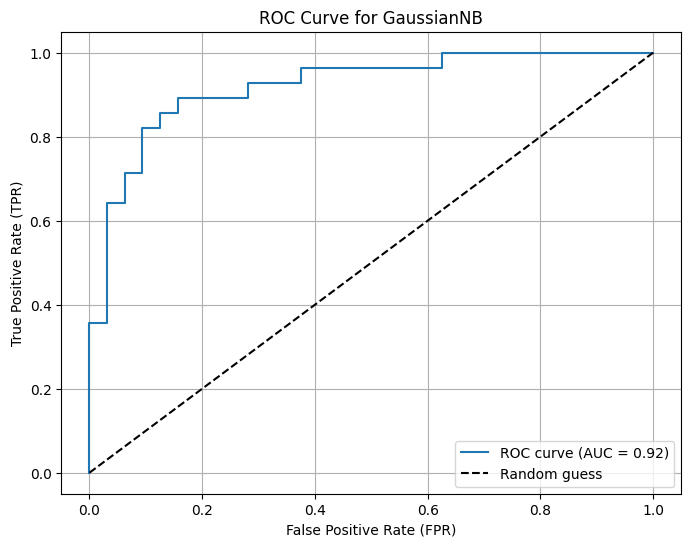

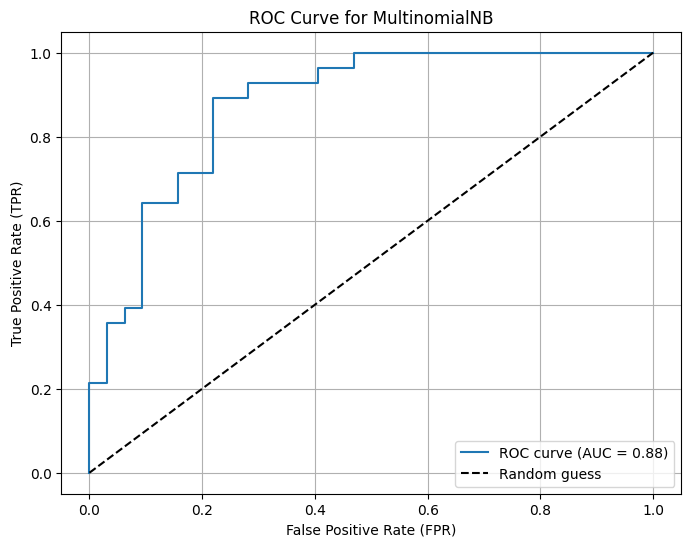

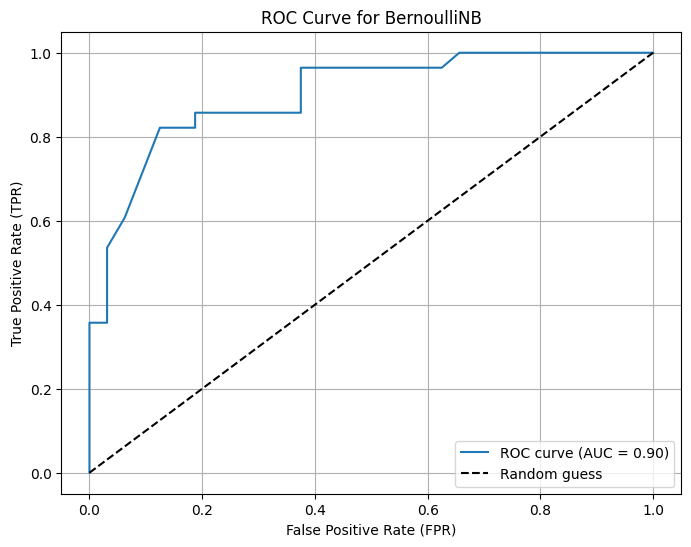

In [151]:
roc_curve_method(y_test_bin, y_pred1_proba, "GaussianNB")
roc_curve_method(y_test_bin, y_pred2_proba, "MultinomialNB")
roc_curve_method(y_test_bin, y_pred3_proba, "BernoulliNB")

In [152]:
print(classification_report(y_test_bin, y_pred1))
print(classification_report(y_test_bin, y_pred2))
print(classification_report(y_test_bin, y_pred3))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.78      0.89      0.83        28

    accuracy                           0.83        60
   macro avg       0.84      0.84      0.83        60
weighted avg       0.84      0.83      0.83        60

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.77      0.86      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.75      0.86      0.80        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



In [153]:
print(confusion_matrix(y_test_bin, y_pred1))
print(confusion_matrix(y_test_bin, y_pred2))
print(confusion_matrix(y_test_bin, y_pred3))

[[25  7]
 [ 3 25]]
[[25  7]
 [ 4 24]]
[[24  8]
 [ 4 24]]


In [154]:
print(grid_search1.best_params_)
print(grid_search2.best_params_)
print(grid_search3.best_params_)

{'classifier__var_smoothing': 1e-09}
{'classifier__alpha': 0.1, 'classifier__fit_prior': False}
{'classifier__alpha': 0.1, 'classifier__fit_prior': False}


KFold

In [155]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [156]:
grid_search1 = GridSearchCV(clone(pipeline_gaussian), param_grid_gaussian, cv=kf, scoring='accuracy')
grid_search2 = GridSearchCV(clone(pipeline_multinomial), param_grid_multinomial, cv=kf, scoring='accuracy')

In [157]:
grid_search1.fit(X_multi, y_multi)
grid_search2.fit(X_multi, y_multi)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('classifier', MultinomialNB())]),
             param_grid={'classifier__alpha': [0.1, 0.5, 1.0, 2.0],
                         'classifier__fit_prior': [True, False]},
             scoring='accuracy')

In [158]:
print("Лучшие параметры:", grid_search1.best_params_)
print("Лучший скор на кросс-валидации:", grid_search1.best_score_)
print("Лучшие параметры:", grid_search2.best_params_)
print("Лучший скор на кросс-валидации:", grid_search2.best_score_)

Лучшие параметры: {'classifier__var_smoothing': 1e-06}
Лучший скор на кросс-валидации: 0.5571751412429379
Лучшие параметры: {'classifier__alpha': 0.1, 'classifier__fit_prior': True}
Лучший скор на кросс-валидации: 0.5471186440677966


In [159]:
y_pred1 = cross_val_predict(grid_search1.best_estimator_, X_multi, y_multi, cv=kf)
y_pred2 = cross_val_predict(grid_search2.best_estimator_, X_multi, y_multi, cv=kf)

In [160]:
sk_learn_metrics_multi(y_multi, y_pred1)
self_made_metrics_multi(y_multi, y_pred1)
sk_learn_metrics_multi(y_multi, y_pred2)
self_made_metrics_multi(y_multi, y_pred2)

[0.85       0.29090909 0.11764706 0.22857143 0.08333333]
[0.84735202 0.2962963  0.125      0.23880597 0.0625    ]
[0.8447205  0.30188679 0.13333333 0.25       0.05      ]
[[136, 16, 3, 2, 3], [22, 16, 7, 5, 5], [1, 11, 4, 12, 6], [2, 6, 14, 8, 5], [0, 4, 2, 5, 1]]
accuracy: 0.5574324324324325
precision: {0: np.float64(0.84472049689441), 1: np.float64(0.3018867924528302), 2: np.float64(0.13333333333333333), 3: np.float64(0.25), 4: np.float64(0.05)}
recall: {0: np.float64(0.85), 1: np.float64(0.2909090909090909), 2: np.float64(0.11764705882352941), 3: np.float64(0.22857142857142856), 4: np.float64(0.08333333333333333)}
f1 score: {0: np.float64(0.8473520249221184), 1: np.float64(0.2962962962962963), 2: np.float64(0.125), 3: np.float64(0.23880597014925375), 4: np.float64(0.0625)}
[0.79375    0.27272727 0.26470588 0.2        0.33333333]
[0.79127726 0.28037383 0.25714286 0.22222222 0.25806452]
[0.78881988 0.28846154 0.25       0.25       0.21052632]
[[127, 19, 6, 5, 3], [24, 15, 6, 5, 5], [4

In [161]:
print(classification_report(y_multi, y_pred1))
print(classification_report(y_multi, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       160
           1       0.30      0.29      0.30        55
           2       0.13      0.12      0.12        34
           3       0.25      0.23      0.24        35
           4       0.05      0.08      0.06        12

    accuracy                           0.56       296
   macro avg       0.32      0.31      0.31       296
weighted avg       0.56      0.56      0.56       296

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       160
           1       0.29      0.27      0.28        55
           2       0.25      0.26      0.26        34
           3       0.25      0.20      0.22        35
           4       0.21      0.33      0.26        12

    accuracy                           0.55       296
   macro avg       0.36      0.37      0.36       296
weighted avg       0.55      0.55      0.55       296



In [162]:
print(confusion_matrix(y_multi, y_pred1))
print(confusion_matrix(y_multi, y_pred2))

[[136  16   3   2   3]
 [ 22  16   7   5   5]
 [  1  11   4  12   6]
 [  2   6  14   8   5]
 [  0   4   2   5   1]]
[[127  19   6   5   3]
 [ 24  15   6   5   5]
 [  4   8   9   9   4]
 [  4   8  13   7   3]
 [  2   2   2   2   4]]


In [163]:
grid_search1 = GridSearchCV(clone(pipeline_gaussian), param_grid_gaussian, cv=kf, scoring='accuracy')
grid_search2 = GridSearchCV(clone(pipeline_multinomial), param_grid_multinomial, cv=kf, scoring='accuracy')
grid_search3 = GridSearchCV(clone(pipeline_bernoulli), param_grid_bernoulli, cv=kf, scoring='accuracy')

In [164]:
grid_search1.fit(X_multi_bin, y_multi_bin)
grid_search2.fit(X_multi_bin, y_multi_bin)
grid_search3.fit(X_multi_bin, y_multi_bin)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('classifier', BernoulliNB())]),
             param_grid={'classifier__alpha': [0.1, 0.5, 1.0, 2.0],
                         'classifier__fit_prior': [True, False]},
             scoring='accuracy')

In [165]:
print("Лучшие параметры:", grid_search1.best_params_)
print("Лучший скор на кросс-валидации:", grid_search1.best_score_)
print("Лучшие параметры:", grid_search2.best_params_)
print("Лучший скор на кросс-валидации:", grid_search2.best_score_)
print("Лучшие параметры:", grid_search3.best_params_)
print("Лучший скор на кросс-валидации:", grid_search3.best_score_)

Лучшие параметры: {'classifier__var_smoothing': 1e-09}
Лучший скор на кросс-валидации: 0.834180790960452
Лучшие параметры: {'classifier__alpha': 0.1, 'classifier__fit_prior': False}
Лучший скор на кросс-валидации: 0.7766101694915254
Лучшие параметры: {'classifier__alpha': 0.1, 'classifier__fit_prior': True}
Лучший скор на кросс-валидации: 0.7971186440677965


In [166]:
y_pred1, y_pred1_proba = cross_val_predict(grid_search1.best_estimator_, X_multi_bin, y_multi_bin, cv=kf), cross_val_predict(grid_search1.best_estimator_, X_multi_bin, y_multi_bin, cv=kf, method='predict_proba')[:,1]
y_pred2, y_pred2_proba = cross_val_predict(grid_search2.best_estimator_, X_multi_bin, y_multi_bin, cv=kf), cross_val_predict(grid_search2.best_estimator_, X_multi_bin, y_multi_bin, cv=kf, method='predict_proba')[:,1]
y_pred3, y_pred3_proba = cross_val_predict(grid_search3.best_estimator_, X_multi_bin, y_multi_bin, cv=kf), cross_val_predict(grid_search3.best_estimator_, X_multi_bin, y_multi_bin, cv=kf, method='predict_proba')[:,1]

In [167]:
sk_learn_metrics_binary(y_multi_bin, y_pred1)
self_made_metrics_binary(y_multi_bin, y_pred1)
sk_learn_metrics_binary(y_multi_bin, y_pred2)
self_made_metrics_binary(y_multi_bin, y_pred2)
sk_learn_metrics_binary(y_multi_bin, y_pred3)
self_made_metrics_binary(y_multi_bin, y_pred3)

0.7941176470588235
0.8150943396226416
0.8372093023255814
[[139, 21], [28, 108]]
accuracy: 0.8344594594594594
precision: 0.8372093023255814
recall: 0.7941176470588235
f1 score: 0.8150943396226416
0.75
0.7555555555555555
0.7611940298507462
[[128, 32], [34, 102]]
accuracy: 0.777027027027027
precision: 0.7611940298507462
recall: 0.75
f1 score: 0.7555555555555554
0.7647058823529411
0.7761194029850746
0.7878787878787878
[[132, 28], [32, 104]]
accuracy: 0.7972972972972973
precision: 0.7878787878787878
recall: 0.7647058823529411
f1 score: 0.7761194029850745


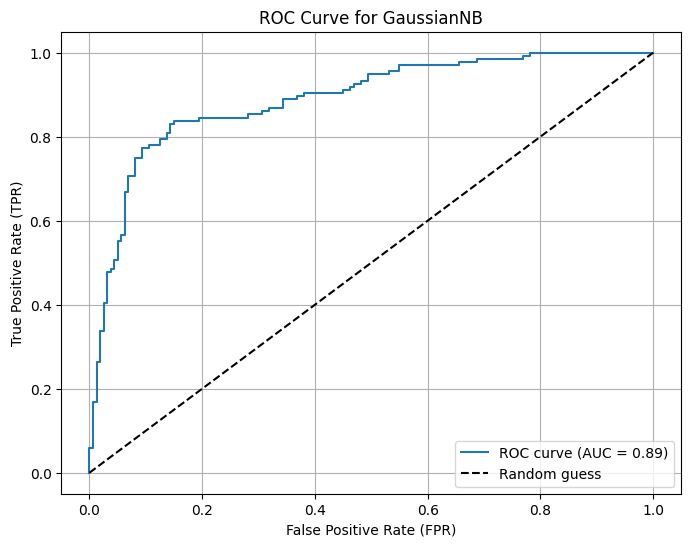

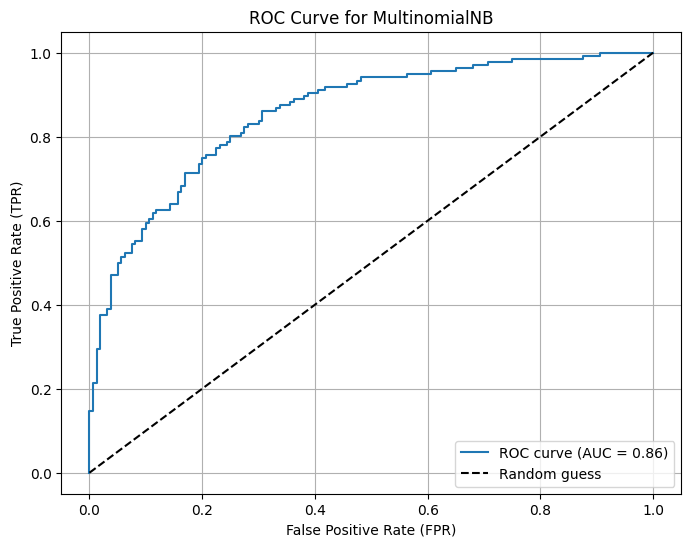

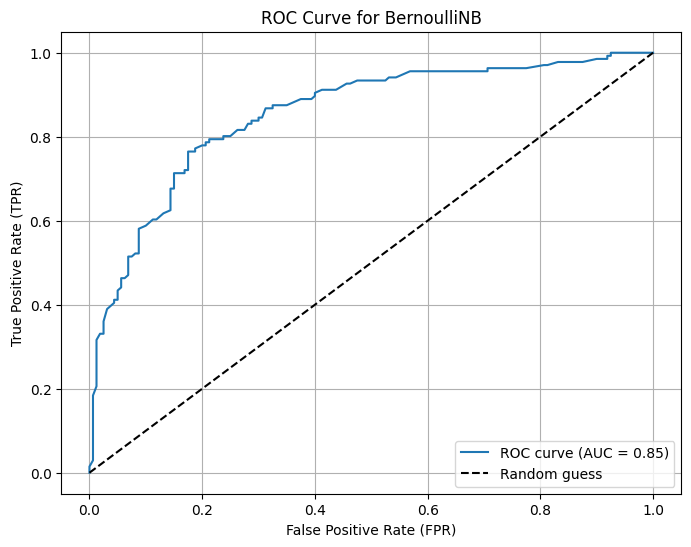

In [168]:
roc_curve_method(y_multi_bin, y_pred1_proba, "GaussianNB")
roc_curve_method(y_multi_bin, y_pred2_proba, "MultinomialNB")
roc_curve_method(y_multi_bin, y_pred3_proba, "BernoulliNB")

In [169]:
print(classification_report(y_multi_bin, y_pred1))
print(classification_report(y_multi_bin, y_pred2))
print(classification_report(y_multi_bin, y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       160
           1       0.84      0.79      0.82       136

    accuracy                           0.83       296
   macro avg       0.83      0.83      0.83       296
weighted avg       0.83      0.83      0.83       296

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       160
           1       0.76      0.75      0.76       136

    accuracy                           0.78       296
   macro avg       0.78      0.78      0.78       296
weighted avg       0.78      0.78      0.78       296

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       160
           1       0.79      0.76      0.78       136

    accuracy                           0.80       296
   macro avg       0.80      0.79      0.80       296
weighted avg       0.80      0.80      0.80       296



In [170]:
print(confusion_matrix(y_multi_bin, y_pred1))
print(confusion_matrix(y_multi_bin, y_pred2))
print(confusion_matrix(y_multi_bin, y_pred3))

[[139  21]
 [ 28 108]]
[[128  32]
 [ 34 102]]
[[132  28]
 [ 32 104]]


SVM

In [171]:
param_grid_linear = {
    'scaler__with_mean': [True, False],  # Параметр для StandardScaler
    'classifier__C': [0.1, 1, 10]        # Параметр регуляризации
}

In [172]:
param_grid_poly = {
    'scaler__with_mean': [True, False],  # Параметр для StandardScaler
    'classifier__C': [0.1, 1, 10],       # Параметр регуляризации
    'classifier__degree': [2, 3, 4],     # Степень полиномиального ядра
    'classifier__coef0': [0, 1, 2]       # Параметр для полиномиального ядра
}

In [173]:
param_grid_rbf = {
    'scaler__with_mean': [True, False],  # Параметр для StandardScaler
    'classifier__C': [0.1, 1, 10],       # Параметр регуляризации
    'classifier__gamma': [0.1, 1, 10]    # Параметр для RBF-ядра
}

In [174]:
param_grid_sigmoid = {
    'scaler__with_mean': [True, False],  # Параметр для StandardScaler
    'classifier__C': [0.1, 1, 10],       # Параметр регуляризации
    'classifier__gamma': [0.1, 1, 10],   # Параметр для сигмоидального ядра
    'classifier__coef0': [0, 1, 2]       # Параметр для сигмоидального ядра
}

In [175]:
param_grid_exponential = {
    'scaler__with_mean': [True, False],  # Параметр для StandardScaler
    'classifier__C': [0.1, 1, 10],       # Параметр регуляризации
    'classifier__gamma': [0.1, 1, 10]    # Параметр для экспоненциального ядра
}

In [176]:
# Пайплайн для Linear Kernel
pipeline_linear = Pipeline([
    ('scaler', StandardScaler()),  # Масштабирование данных
    ('classifier', SVC(kernel='linear', probability=True))  # Линейное ядро
])

# Пайплайн для Polynomial Kernel
pipeline_poly = Pipeline([
    ('scaler', StandardScaler()),  # Масштабирование данных
    ('classifier', SVC(kernel='poly', probability=True))  # Полиномиальное ядро
])

# Пайплайн для RBF Kernel
pipeline_rbf = Pipeline([
    ('scaler', StandardScaler()),  # Масштабирование данных
    ('classifier', SVC(kernel='rbf', probability=True))  # RBF ядро
])

# Пайплайн для Sigmoid Kernel
pipeline_sigmoid = Pipeline([
    ('scaler', StandardScaler()),  # Масштабирование данных
    ('classifier', SVC(kernel='sigmoid', probability=True))  # Сигмоидальное ядро
])

# Пайплайн для Exponential Kernel (экспоненциальное ядро как частный случай RBF)
pipeline_exponential = Pipeline([
    ('scaler', StandardScaler()),  # Масштабирование данных
    ('classifier', SVC(kernel='rbf', probability=True))  # Используем RBF с фиксированным gamma
])

SMOTE

In [177]:
grid_search1 = GridSearchCV(clone(pipeline_linear), param_grid_linear, cv=5, scoring='accuracy')
grid_search2 = GridSearchCV(clone(pipeline_poly), param_grid_poly, cv=5, scoring='accuracy')
grid_search3 = GridSearchCV(clone(pipeline_rbf), param_grid_rbf, cv=5, scoring='accuracy')
grid_search4 = GridSearchCV(clone(pipeline_sigmoid), param_grid_sigmoid, cv=5, scoring='accuracy')
grid_search5 = GridSearchCV(clone(pipeline_exponential), param_grid_exponential, cv=5, scoring='accuracy')

In [178]:
grid_search1.fit(transformed_X_train, transformed_y_train)
grid_search2.fit(transformed_X_train, transformed_y_train)
grid_search3.fit(transformed_X_train, transformed_y_train)
grid_search4.fit(transformed_X_train, transformed_y_train)
grid_search5.fit(transformed_X_train, transformed_y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC(probability=True))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': [0.1, 1, 10],
                         'scaler__with_mean': [True, False]},
             scoring='accuracy')

In [179]:
print("Лучшие параметры:", grid_search1.best_params_)
print("Лучшие параметры:", grid_search2.best_params_)
print("Лучшие параметры:", grid_search3.best_params_)
print("Лучшие параметры:", grid_search4.best_params_)
print("Лучшие параметры:", grid_search5.best_params_)

Лучшие параметры: {'classifier__C': 10, 'scaler__with_mean': False}
Лучшие параметры: {'classifier__C': 1, 'classifier__coef0': 1, 'classifier__degree': 4, 'scaler__with_mean': True}
Лучшие параметры: {'classifier__C': 10, 'classifier__gamma': 0.1, 'scaler__with_mean': True}
Лучшие параметры: {'classifier__C': 0.1, 'classifier__coef0': 0, 'classifier__gamma': 0.1, 'scaler__with_mean': True}
Лучшие параметры: {'classifier__C': 10, 'classifier__gamma': 0.1, 'scaler__with_mean': True}


In [180]:
y_pred1 = grid_search1.predict(X_test)
y_pred2 = grid_search2.predict(X_test)
y_pred3 = grid_search3.predict(X_test)
y_pred4 = grid_search4.predict(X_test)
y_pred5 = grid_search5.predict(X_test)

In [181]:
sk_learn_metrics_multi(y_test, y_pred1)
self_made_metrics_multi(y_test, y_pred1)
sk_learn_metrics_multi(y_test, y_pred2)
self_made_metrics_multi(y_test, y_pred2)
sk_learn_metrics_multi(y_test, y_pred3)
self_made_metrics_multi(y_test, y_pred3)
sk_learn_metrics_multi(y_test, y_pred4)
self_made_metrics_multi(y_test, y_pred4)
sk_learn_metrics_multi(y_test, y_pred5)
self_made_metrics_multi(y_test, y_pred5)

[0.8125     0.72727273 0.28571429 0.85714286 0.33333333]
[0.86666667 0.61538462 0.33333333 0.75       0.33333333]
[0.92857143 0.53333333 0.4        0.66666667 0.33333333]
[[26, 4, 1, 0, 1], [2, 8, 1, 0, 0], [0, 3, 2, 2, 0], [0, 0, 0, 6, 1], [0, 0, 1, 1, 1]]
accuracy: 0.7166666666666667
precision: {0: np.float64(0.9285714285714286), 1: np.float64(0.5333333333333333), 2: np.float64(0.4), 3: np.float64(0.6666666666666666), 4: np.float64(0.3333333333333333)}
recall: {0: np.float64(0.8125), 1: np.float64(0.7272727272727273), 2: np.float64(0.2857142857142857), 3: np.float64(0.8571428571428571), 4: np.float64(0.3333333333333333)}
f1 score: {0: np.float64(0.8666666666666666), 1: np.float64(0.6153846153846153), 2: np.float64(0.3333333333333333), 3: np.float64(0.75), 4: np.float64(0.3333333333333333)}
[0.90625    0.90909091 0.71428571 0.85714286 0.66666667]
[0.93548387 0.8        0.83333333 0.8        0.66666667]
[0.96666667 0.71428571 1.         0.75       0.66666667]
[[29, 2, 0, 1, 0], [1, 10,

In [182]:
print(classification_report(y_test, y_pred1))
print(classification_report(y_test, y_pred2))
print(classification_report(y_test, y_pred3))
print(classification_report(y_test, y_pred4))
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.53      0.73      0.62        11
           2       0.40      0.29      0.33         7
           3       0.67      0.86      0.75         7
           4       0.33      0.33      0.33         3

    accuracy                           0.72        60
   macro avg       0.57      0.60      0.58        60
weighted avg       0.73      0.72      0.72        60

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.71      0.91      0.80        11
           2       1.00      0.71      0.83         7
           3       0.75      0.86      0.80         7
           4       0.67      0.67      0.67         3

    accuracy                           0.87        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.88      0.87      0.87        60

              precisio

In [183]:
print(confusion_matrix(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred5))

[[26  4  1  0  1]
 [ 2  8  1  0  0]
 [ 0  3  2  2  0]
 [ 0  0  0  6  1]
 [ 0  0  1  1  1]]
[[29  2  0  1  0]
 [ 1 10  0  0  0]
 [ 0  1  5  1  0]
 [ 0  0  0  6  1]
 [ 0  1  0  0  2]]
[[30  1  0  1  0]
 [ 1 10  0  0  0]
 [ 0  1  5  1  0]
 [ 1  0  0  6  0]
 [ 0  1  0  0  2]]
[[23  6  1  0  2]
 [ 2  6  2  1  0]
 [ 0  2  0  2  3]
 [ 0  0  1  5  1]
 [ 0  0  1  1  1]]
[[30  1  0  1  0]
 [ 1 10  0  0  0]
 [ 0  1  5  1  0]
 [ 1  0  0  6  0]
 [ 0  1  0  0  2]]


In [184]:
print(grid_search1.best_params_)
print(grid_search2.best_params_)
print(grid_search3.best_params_)
print(grid_search4.best_params_)
print(grid_search5.best_params_)

{'classifier__C': 10, 'scaler__with_mean': False}
{'classifier__C': 1, 'classifier__coef0': 1, 'classifier__degree': 4, 'scaler__with_mean': True}
{'classifier__C': 10, 'classifier__gamma': 0.1, 'scaler__with_mean': True}
{'classifier__C': 0.1, 'classifier__coef0': 0, 'classifier__gamma': 0.1, 'scaler__with_mean': True}
{'classifier__C': 10, 'classifier__gamma': 0.1, 'scaler__with_mean': True}


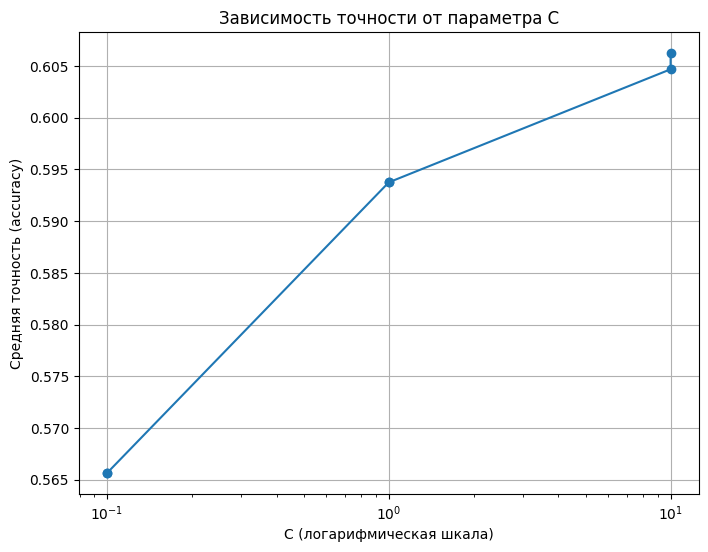

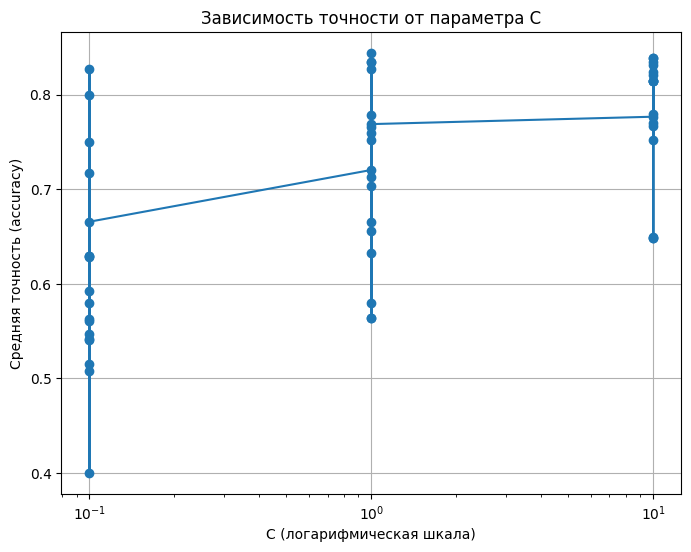

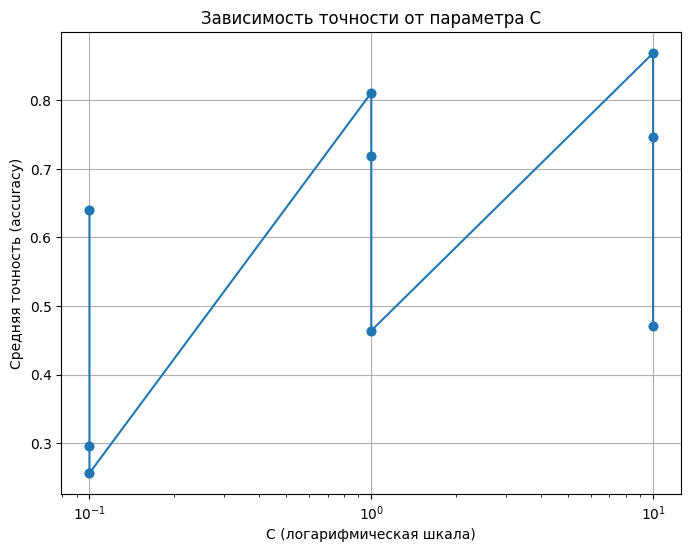

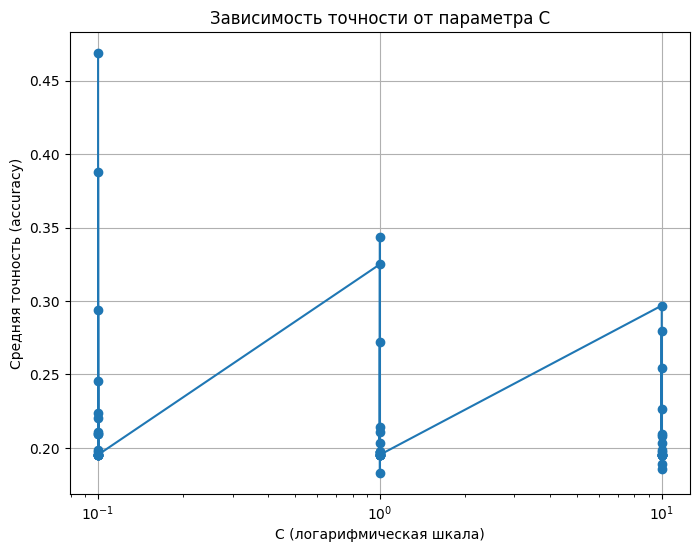

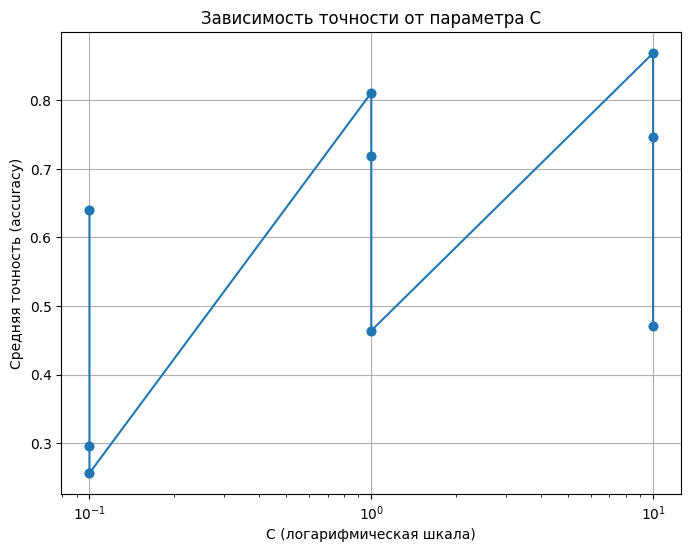

In [185]:
plot_for_svm(grid_search1)
plot_for_svm(grid_search2)
plot_for_svm(grid_search3)
plot_for_svm(grid_search4)
plot_for_svm(grid_search5)

In [186]:
grid_search1 = GridSearchCV(clone(pipeline_linear), param_grid_linear, cv=5, scoring='accuracy')
grid_search2 = GridSearchCV(clone(pipeline_poly), param_grid_poly, cv=5, scoring='accuracy')
grid_search3 = GridSearchCV(clone(pipeline_rbf), param_grid_rbf, cv=5, scoring='accuracy')
grid_search4 = GridSearchCV(clone(pipeline_sigmoid), param_grid_sigmoid, cv=5, scoring='accuracy')
grid_search5 = GridSearchCV(clone(pipeline_exponential), param_grid_exponential, cv=5, scoring='accuracy')

In [187]:
grid_search1.fit(transformed_X_train_bin, transformed_y_train_bin)
grid_search2.fit(transformed_X_train_bin, transformed_y_train_bin)
grid_search3.fit(transformed_X_train_bin, transformed_y_train_bin)
grid_search4.fit(transformed_X_train_bin, transformed_y_train_bin)
grid_search5.fit(transformed_X_train_bin, transformed_y_train_bin)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC(probability=True))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': [0.1, 1, 10],
                         'scaler__with_mean': [True, False]},
             scoring='accuracy')

In [188]:
print(grid_search1.best_params_)
print(grid_search2.best_params_)
print(grid_search3.best_params_)
print(grid_search4.best_params_)
print(grid_search5.best_params_)

{'classifier__C': 0.1, 'scaler__with_mean': True}
{'classifier__C': 0.1, 'classifier__coef0': 1, 'classifier__degree': 3, 'scaler__with_mean': False}
{'classifier__C': 1, 'classifier__gamma': 0.1, 'scaler__with_mean': True}
{'classifier__C': 0.1, 'classifier__coef0': 0, 'classifier__gamma': 0.1, 'scaler__with_mean': True}
{'classifier__C': 1, 'classifier__gamma': 0.1, 'scaler__with_mean': True}


In [189]:
y_pred1, y_pred1_proba = grid_search1.predict(X_test_bin), grid_search1.predict_proba(X_test_bin)[:,1]
y_pred2, y_pred2_proba = grid_search2.predict(X_test_bin), grid_search2.predict_proba(X_test_bin)[:,1]
y_pred3, y_pred3_proba = grid_search3.predict(X_test_bin), grid_search3.predict_proba(X_test_bin)[:,1]
y_pred4, y_pred4_proba = grid_search4.predict(X_test_bin), grid_search4.predict_proba(X_test_bin)[:,1]
y_pred5, y_pred5_proba = grid_search5.predict(X_test_bin), grid_search5.predict_proba(X_test_bin)[:,1]

In [190]:
sk_learn_metrics_binary(y_test_bin, y_pred1)
self_made_metrics_binary(y_test_bin, y_pred1)
sk_learn_metrics_binary(y_test_bin, y_pred2)
self_made_metrics_binary(y_test_bin, y_pred2)
sk_learn_metrics_binary(y_test_bin, y_pred3)
self_made_metrics_binary(y_test_bin, y_pred3)
sk_learn_metrics_binary(y_test_bin, y_pred4)
self_made_metrics_binary(y_test_bin, y_pred4)
sk_learn_metrics_binary(y_test_bin, y_pred5)
self_made_metrics_binary(y_test_bin, y_pred5)

0.9285714285714286
0.8813559322033898
0.8387096774193549
[[27, 5], [2, 26]]
accuracy: 0.8833333333333333
precision: 0.8387096774193549
recall: 0.9285714285714286
f1 score: 0.8813559322033899
0.9285714285714286
0.8813559322033898
0.8387096774193549
[[27, 5], [2, 26]]
accuracy: 0.8833333333333333
precision: 0.8387096774193549
recall: 0.9285714285714286
f1 score: 0.8813559322033899
0.8571428571428571
0.8888888888888888
0.9230769230769231
[[30, 2], [4, 24]]
accuracy: 0.9
precision: 0.9230769230769231
recall: 0.8571428571428571
f1 score: 0.888888888888889
0.9285714285714286
0.8813559322033898
0.8387096774193549
[[27, 5], [2, 26]]
accuracy: 0.8833333333333333
precision: 0.8387096774193549
recall: 0.9285714285714286
f1 score: 0.8813559322033899
0.8571428571428571
0.8888888888888888
0.9230769230769231
[[30, 2], [4, 24]]
accuracy: 0.9
precision: 0.9230769230769231
recall: 0.8571428571428571
f1 score: 0.888888888888889


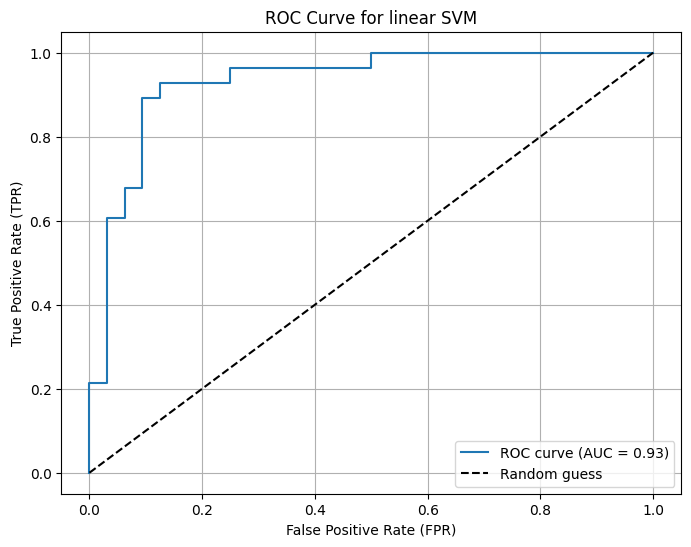

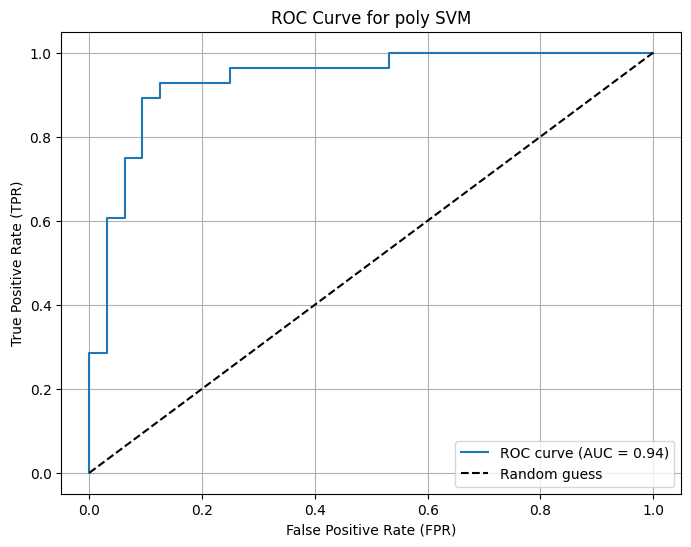

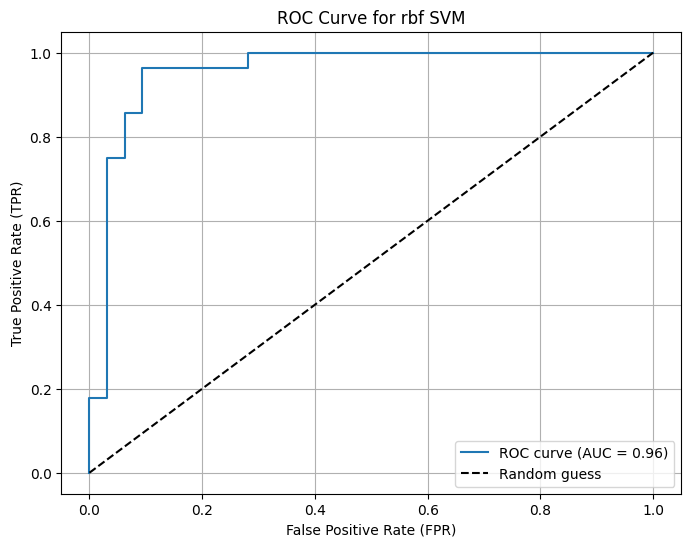

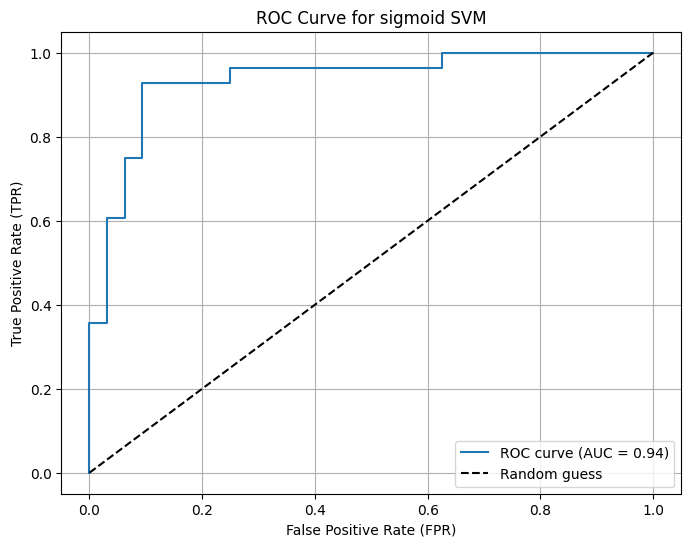

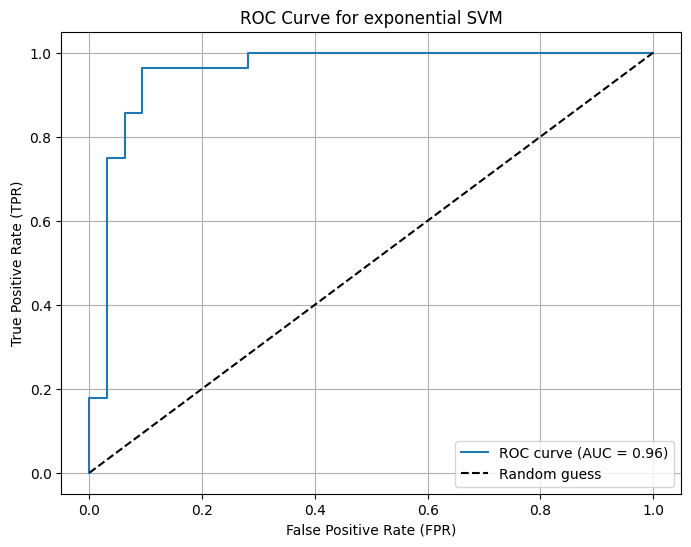

In [191]:
roc_curve_method(y_test_bin, y_pred1_proba, "linear SVM")
roc_curve_method(y_test_bin, y_pred2_proba, "poly SVM")
roc_curve_method(y_test_bin, y_pred3_proba, "rbf SVM")
roc_curve_method(y_test_bin, y_pred4_proba, "sigmoid SVM")
roc_curve_method(y_test_bin, y_pred5_proba, "exponential SVM")

In [192]:
print(classification_report(y_test_bin, y_pred1))
print(classification_report(y_test_bin, y_pred2))
print(classification_report(y_test_bin, y_pred3))
print(classification_report(y_test_bin, y_pred4))
print(classification_report(y_test_bin, y_pred5))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89        32
           1       0.84      0.93      0.88        28

    accuracy                           0.88        60
   macro avg       0.88      0.89      0.88        60
weighted avg       0.89      0.88      0.88        60

              precision    recall  f1-score   support

           0       0.93      0.84      0.89        32
           1       0.84      0.93      0.88        28

    accuracy                           0.88        60
   macro avg       0.88      0.89      0.88        60
weighted avg       0.89      0.88      0.88        60

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.92      0.86      0.89        28

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60

              preci

In [193]:
print(confusion_matrix(y_test_bin, y_pred1))
print(confusion_matrix(y_test_bin, y_pred2))
print(confusion_matrix(y_test_bin, y_pred3))
print(confusion_matrix(y_test_bin, y_pred4))
print(confusion_matrix(y_test_bin, y_pred5))

[[27  5]
 [ 2 26]]
[[27  5]
 [ 2 26]]
[[30  2]
 [ 4 24]]
[[27  5]
 [ 2 26]]
[[30  2]
 [ 4 24]]


In [194]:
print(grid_search1.best_params_)
print(grid_search2.best_params_)
print(grid_search3.best_params_)
print(grid_search4.best_params_)
print(grid_search5.best_params_)

{'classifier__C': 0.1, 'scaler__with_mean': True}
{'classifier__C': 0.1, 'classifier__coef0': 1, 'classifier__degree': 3, 'scaler__with_mean': False}
{'classifier__C': 1, 'classifier__gamma': 0.1, 'scaler__with_mean': True}
{'classifier__C': 0.1, 'classifier__coef0': 0, 'classifier__gamma': 0.1, 'scaler__with_mean': True}
{'classifier__C': 1, 'classifier__gamma': 0.1, 'scaler__with_mean': True}


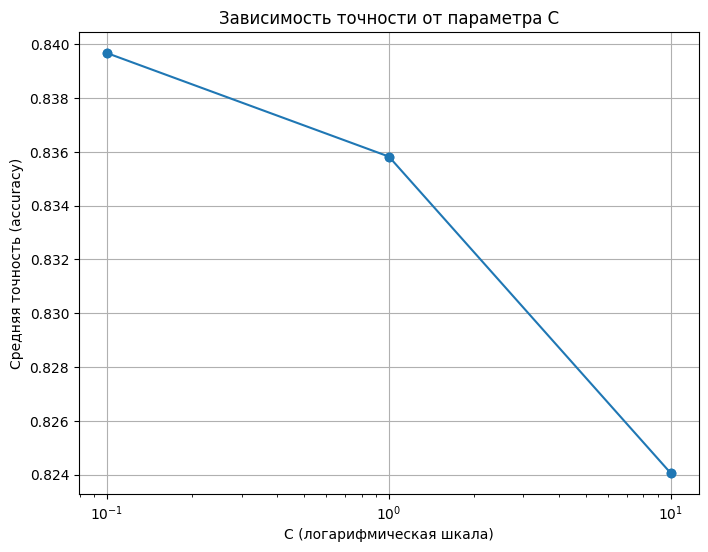

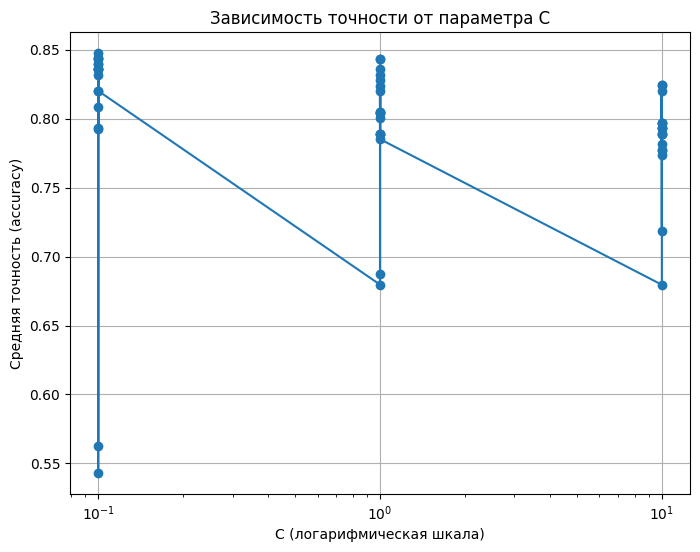

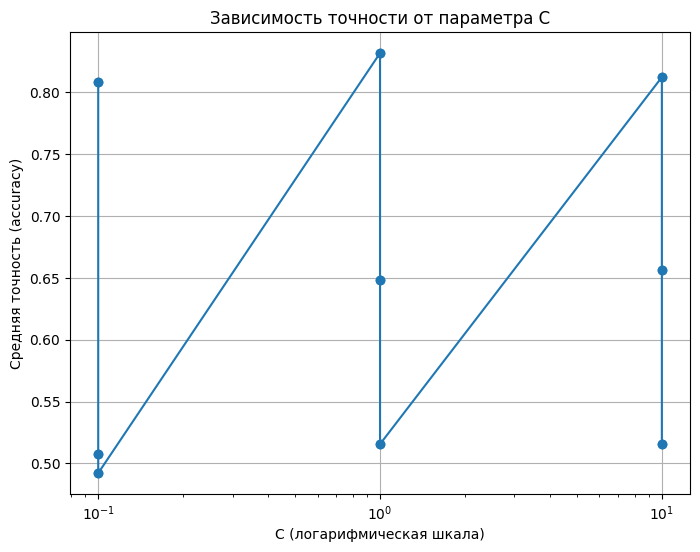

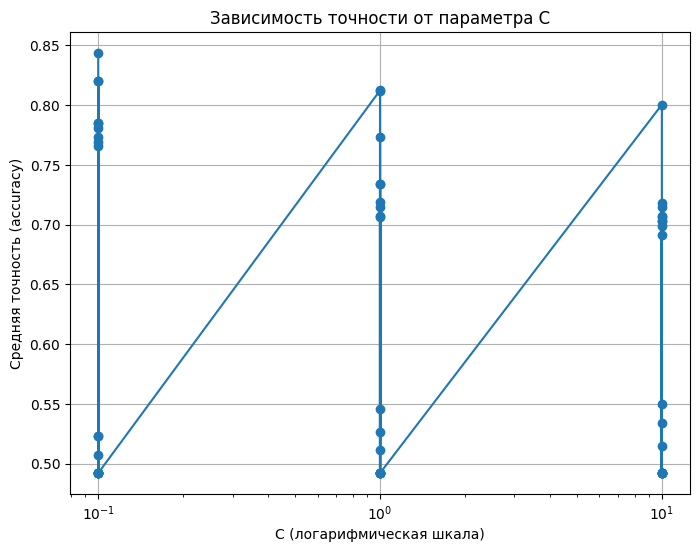

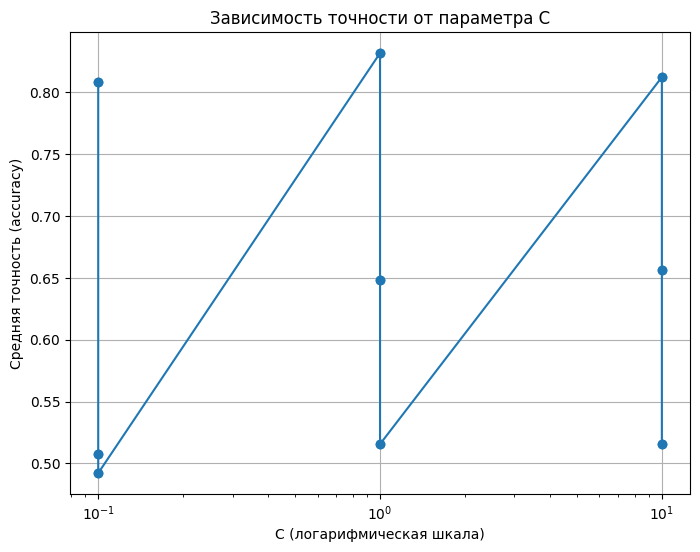

In [195]:
plot_for_svm(grid_search1)
plot_for_svm(grid_search2)
plot_for_svm(grid_search3)
plot_for_svm(grid_search4)
plot_for_svm(grid_search5)

Stratify

In [196]:
grid_search1 = GridSearchCV(clone(pipeline_linear), param_grid_linear, cv=5, scoring='accuracy')
grid_search2 = GridSearchCV(clone(pipeline_poly), param_grid_poly, cv=5, scoring='accuracy')
grid_search3 = GridSearchCV(clone(pipeline_rbf), param_grid_rbf, cv=5, scoring='accuracy')
grid_search4 = GridSearchCV(clone(pipeline_sigmoid), param_grid_sigmoid, cv=5, scoring='accuracy')
grid_search5 = GridSearchCV(clone(pipeline_exponential), param_grid_exponential, cv=5, scoring='accuracy')

In [197]:
grid_search1.fit(X_train, y_train);
grid_search2.fit(X_train, y_train);
grid_search3.fit(X_train, y_train);
grid_search4.fit(X_train, y_train);
grid_search5.fit(X_train, y_train);

In [198]:
y_pred1 = grid_search1.predict(X_test)
y_pred2 = grid_search2.predict(X_test)
y_pred3 = grid_search3.predict(X_test)
y_pred4 = grid_search4.predict(X_test)
y_pred5 = grid_search5.predict(X_test)

In [199]:
sk_learn_metrics_multi(y_test, y_pred1)
self_made_metrics_multi(y_test, y_pred1)
sk_learn_metrics_multi(y_test, y_pred2)
self_made_metrics_multi(y_test, y_pred2)
sk_learn_metrics_multi(y_test, y_pred3)
self_made_metrics_multi(y_test, y_pred3)
sk_learn_metrics_multi(y_test, y_pred4)
self_made_metrics_multi(y_test, y_pred4)
sk_learn_metrics_multi(y_test, y_pred5)
self_made_metrics_multi(y_test, y_pred5)

[0.78125    0.36363636 0.         0.28571429 0.        ]
[0.79365079 0.30769231 0.         0.36363636 0.        ]
[0.80645161 0.26666667 0.         0.5        0.        ]
[[25, 5, 2, 0, 0], [5, 4, 2, 0, 0], [1, 4, 0, 2, 0], [0, 1, 3, 2, 1], [0, 1, 2, 0, 0]]
accuracy: 0.5166666666666667
precision: {0: np.float64(0.8064516129032258), 1: np.float64(0.26666666666666666), 2: np.float64(0.0), 3: np.float64(0.5), 4: np.float64(0.0)}
recall: {0: np.float64(0.78125), 1: np.float64(0.36363636363636365), 2: np.float64(0.0), 3: np.float64(0.2857142857142857), 4: np.float64(0.0)}
f1 score: {0: np.float64(0.7936507936507936), 1: np.float64(0.30769230769230765), 2: 0, 3: np.float64(0.36363636363636365), 4: 0}
[0.8125     0.27272727 0.         0.         0.        ]
[0.75362319 0.22222222 0.         0.         0.        ]
[0.7027027 0.1875    0.        0.        0.       ]
[[26, 4, 2, 0, 0], [7, 3, 1, 0, 0], [2, 4, 0, 1, 0], [2, 2, 3, 0, 0], [0, 3, 0, 0, 0]]
accuracy: 0.48333333333333334
precision: {0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [200]:
print(classification_report(y_test, y_pred1))
print(classification_report(y_test, y_pred2))
print(classification_report(y_test, y_pred3))
print(classification_report(y_test, y_pred4))
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.27      0.36      0.31        11
           2       0.00      0.00      0.00         7
           3       0.50      0.29      0.36         7
           4       0.00      0.00      0.00         3

    accuracy                           0.52        60
   macro avg       0.31      0.29      0.29        60
weighted avg       0.54      0.52      0.52        60

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        32
           1       0.19      0.27      0.22        11
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.48        60
   macro avg       0.18      0.22      0.20        60
weighted avg       0.41      0.48      0.44        60

              precisio

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [201]:
print(confusion_matrix(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred5))

[[25  5  2  0  0]
 [ 5  4  2  0  0]
 [ 1  4  0  2  0]
 [ 0  1  3  2  1]
 [ 0  1  2  0  0]]
[[26  4  2  0  0]
 [ 7  3  1  0  0]
 [ 2  4  0  1  0]
 [ 2  2  3  0  0]
 [ 0  3  0  0  0]]
[[28  2  2  0  0]
 [ 6  2  2  1  0]
 [ 1  3  0  3  0]
 [ 0  5  1  1  0]
 [ 0  3  0  0  0]]
[[26  4  1  1  0]
 [ 4  4  1  2  0]
 [ 2  1  0  4  0]
 [ 1  0  1  5  0]
 [ 0  0  1  2  0]]
[[28  2  2  0  0]
 [ 6  2  2  1  0]
 [ 1  3  0  3  0]
 [ 0  5  1  1  0]
 [ 0  3  0  0  0]]


In [202]:
print(grid_search1.best_params_)
print(grid_search2.best_params_)
print(grid_search3.best_params_)
print(grid_search4.best_params_)
print(grid_search5.best_params_)

{'classifier__C': 1, 'scaler__with_mean': False}
{'classifier__C': 0.1, 'classifier__coef0': 0, 'classifier__degree': 4, 'scaler__with_mean': False}
{'classifier__C': 1, 'classifier__gamma': 0.1, 'scaler__with_mean': True}
{'classifier__C': 1, 'classifier__coef0': 1, 'classifier__gamma': 0.1, 'scaler__with_mean': True}
{'classifier__C': 1, 'classifier__gamma': 0.1, 'scaler__with_mean': True}


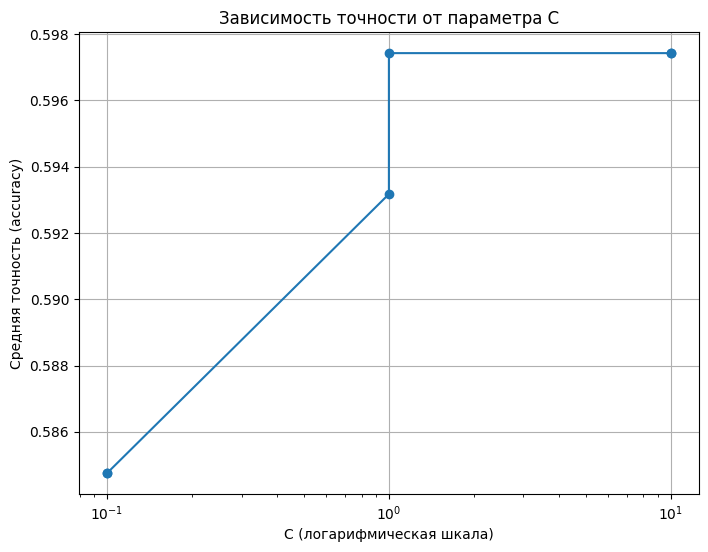

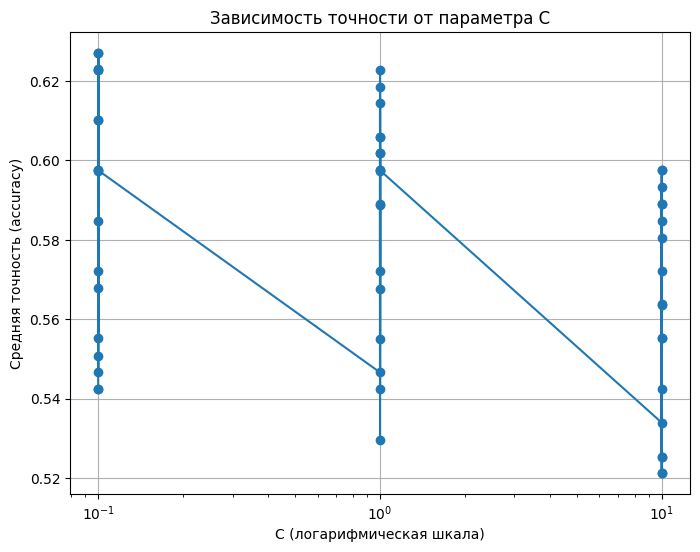

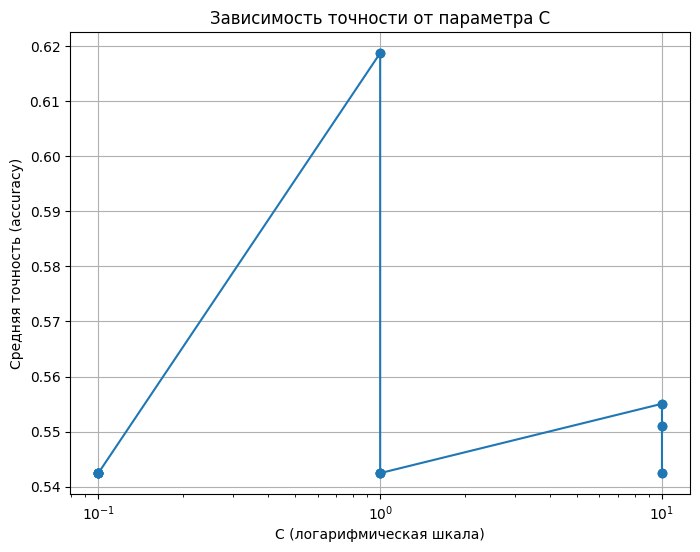

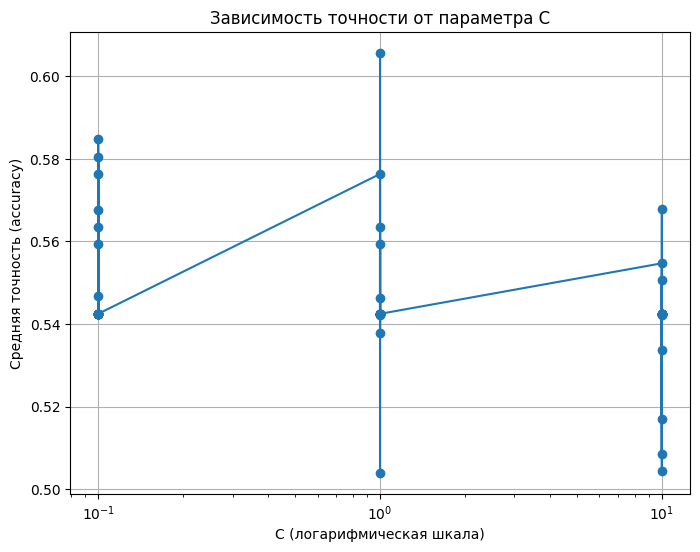

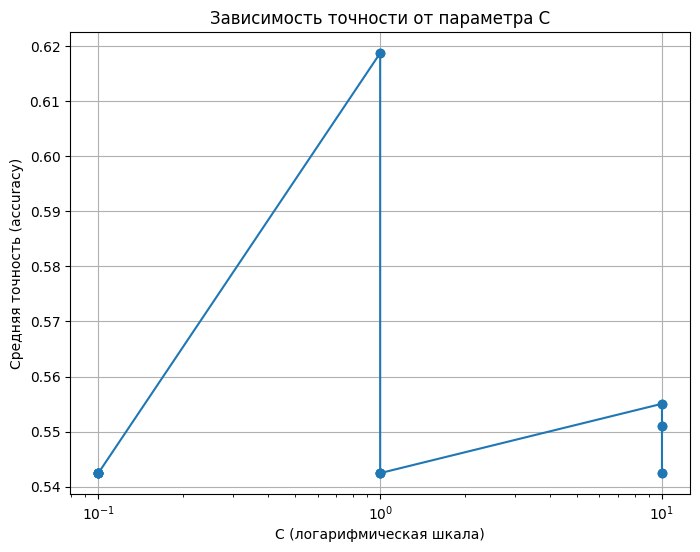

In [203]:
plot_for_svm(grid_search1)
plot_for_svm(grid_search2)
plot_for_svm(grid_search3)
plot_for_svm(grid_search4)
plot_for_svm(grid_search5)

In [204]:
grid_search1 = GridSearchCV(clone(pipeline_linear), param_grid_linear, cv=5, scoring='accuracy')
grid_search2 = GridSearchCV(clone(pipeline_poly), param_grid_poly, cv=5, scoring='accuracy')
grid_search3 = GridSearchCV(clone(pipeline_rbf), param_grid_rbf, cv=5, scoring='accuracy')
grid_search4 = GridSearchCV(clone(pipeline_sigmoid), param_grid_sigmoid, cv=5, scoring='accuracy')
grid_search5 = GridSearchCV(clone(pipeline_exponential), param_grid_exponential, cv=5, scoring='accuracy')

In [205]:
grid_search1.fit(X_train_bin, y_train_bin);
grid_search2.fit(X_train_bin, y_train_bin);
grid_search3.fit(X_train_bin, y_train_bin);
grid_search4.fit(X_train_bin, y_train_bin);
grid_search5.fit(X_train_bin, y_train_bin);

In [206]:
y_pred1, y_pred1_proba = grid_search1.predict(X_test_bin), grid_search1.predict_proba(X_test_bin)[:,1]
y_pred2, y_pred2_proba = grid_search2.predict(X_test_bin), grid_search2.predict_proba(X_test_bin)[:,1]
y_pred3, y_pred3_proba = grid_search3.predict(X_test_bin), grid_search3.predict_proba(X_test_bin)[:,1]
y_pred4, y_pred4_proba = grid_search4.predict(X_test_bin), grid_search4.predict_proba(X_test_bin)[:,1]
y_pred5, y_pred5_proba = grid_search5.predict(X_test_bin), grid_search5.predict_proba(X_test_bin)[:,1]

In [207]:
sk_learn_metrics_binary(y_test_bin, y_pred1)
self_made_metrics_binary(y_test_bin, y_pred1)
sk_learn_metrics_binary(y_test_bin, y_pred2)
self_made_metrics_binary(y_test_bin, y_pred2)
sk_learn_metrics_binary(y_test_bin, y_pred3)
self_made_metrics_binary(y_test_bin, y_pred3)
sk_learn_metrics_binary(y_test_bin, y_pred4)
self_made_metrics_binary(y_test_bin, y_pred4)
sk_learn_metrics_binary(y_test_bin, y_pred5)
self_made_metrics_binary(y_test_bin, y_pred5)

0.9285714285714286
0.8813559322033898
0.8387096774193549
[[27, 5], [2, 26]]
accuracy: 0.8833333333333333
precision: 0.8387096774193549
recall: 0.9285714285714286
f1 score: 0.8813559322033899
0.8571428571428571
0.8135593220338984
0.7741935483870968
[[25, 7], [4, 24]]
accuracy: 0.8166666666666667
precision: 0.7741935483870968
recall: 0.8571428571428571
f1 score: 0.8135593220338982
0.8571428571428571
0.8135593220338984
0.7741935483870968
[[25, 7], [4, 24]]
accuracy: 0.8166666666666667
precision: 0.7741935483870968
recall: 0.8571428571428571
f1 score: 0.8135593220338982
0.9285714285714286
0.8813559322033898
0.8387096774193549
[[27, 5], [2, 26]]
accuracy: 0.8833333333333333
precision: 0.8387096774193549
recall: 0.9285714285714286
f1 score: 0.8813559322033899
0.8571428571428571
0.8135593220338984
0.7741935483870968
[[25, 7], [4, 24]]
accuracy: 0.8166666666666667
precision: 0.7741935483870968
recall: 0.8571428571428571
f1 score: 0.8135593220338982


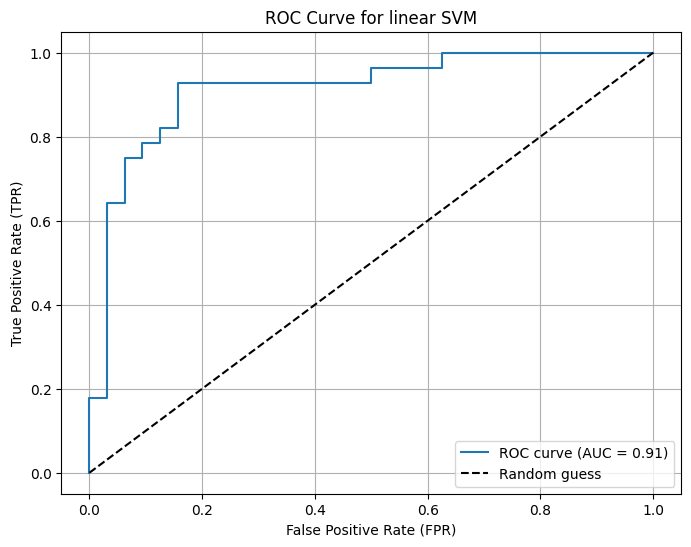

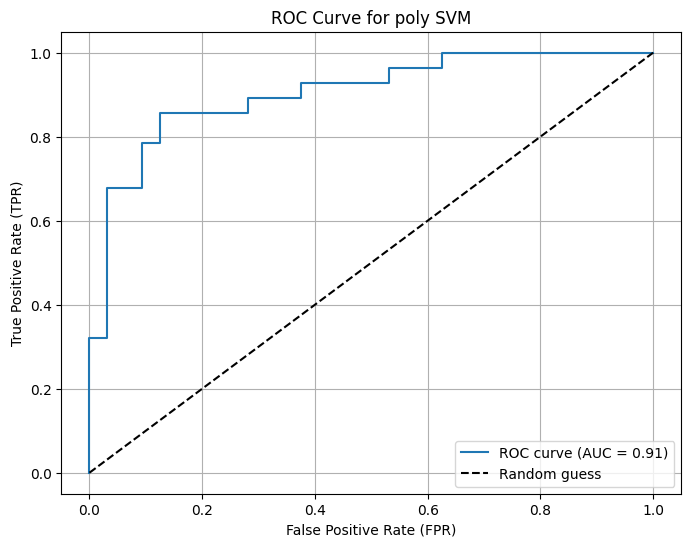

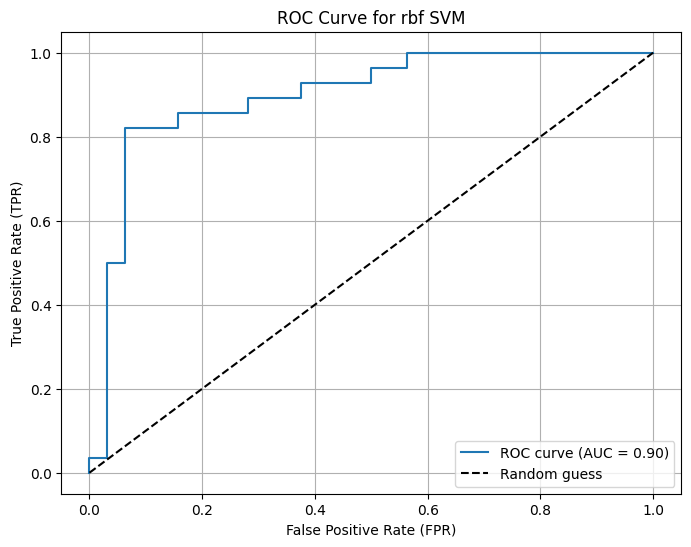

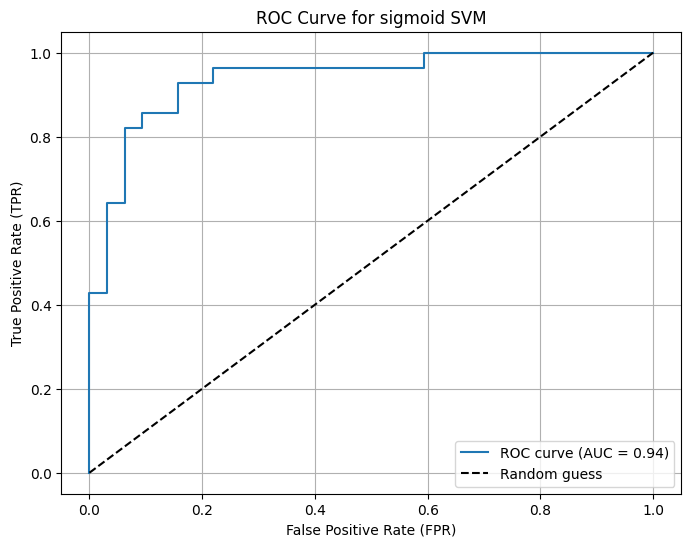

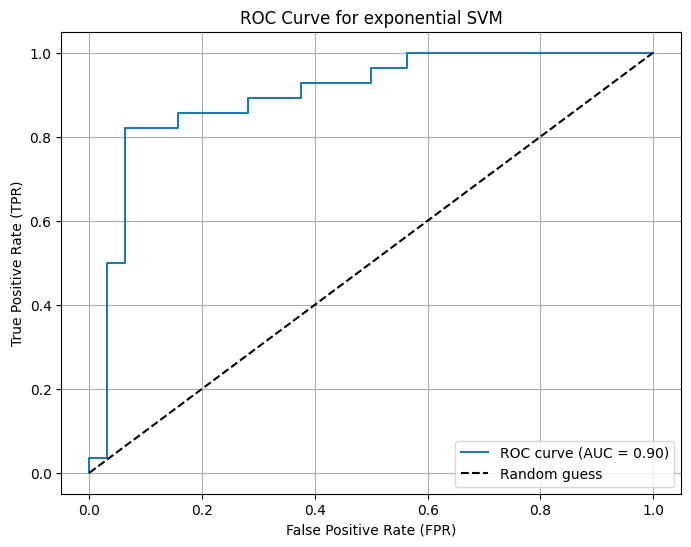

In [208]:
roc_curve_method(y_test_bin, y_pred1_proba, "linear SVM")
roc_curve_method(y_test_bin, y_pred2_proba, "poly SVM")
roc_curve_method(y_test_bin, y_pred3_proba, "rbf SVM")
roc_curve_method(y_test_bin, y_pred4_proba, "sigmoid SVM")
roc_curve_method(y_test_bin, y_pred5_proba, "exponential SVM")

In [209]:
print(classification_report(y_test_bin, y_pred1))
print(classification_report(y_test_bin, y_pred2))
print(classification_report(y_test_bin, y_pred3))
print(classification_report(y_test_bin, y_pred4))
print(classification_report(y_test_bin, y_pred5))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89        32
           1       0.84      0.93      0.88        28

    accuracy                           0.88        60
   macro avg       0.88      0.89      0.88        60
weighted avg       0.89      0.88      0.88        60

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.77      0.86      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.77      0.86      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60

              preci

In [210]:
print(confusion_matrix(y_test_bin, y_pred1))
print(confusion_matrix(y_test_bin, y_pred2))
print(confusion_matrix(y_test_bin, y_pred3))
print(confusion_matrix(y_test_bin, y_pred4))
print(confusion_matrix(y_test_bin, y_pred5))

[[27  5]
 [ 2 26]]
[[25  7]
 [ 4 24]]
[[25  7]
 [ 4 24]]
[[27  5]
 [ 2 26]]
[[25  7]
 [ 4 24]]


In [211]:
print(grid_search1.best_params_)
print(grid_search2.best_params_)
print(grid_search3.best_params_)
print(grid_search4.best_params_)
print(grid_search5.best_params_)

{'classifier__C': 1, 'scaler__with_mean': True}
{'classifier__C': 1, 'classifier__coef0': 1, 'classifier__degree': 2, 'scaler__with_mean': True}
{'classifier__C': 1, 'classifier__gamma': 0.1, 'scaler__with_mean': True}
{'classifier__C': 0.1, 'classifier__coef0': 1, 'classifier__gamma': 0.1, 'scaler__with_mean': True}
{'classifier__C': 1, 'classifier__gamma': 0.1, 'scaler__with_mean': True}


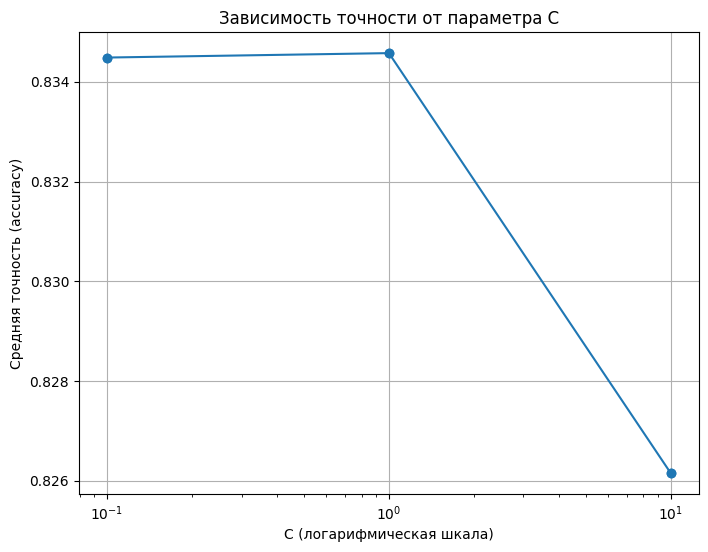

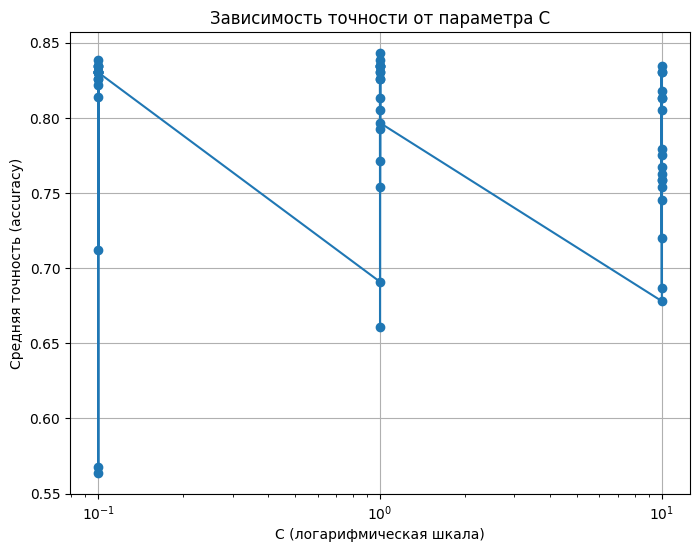

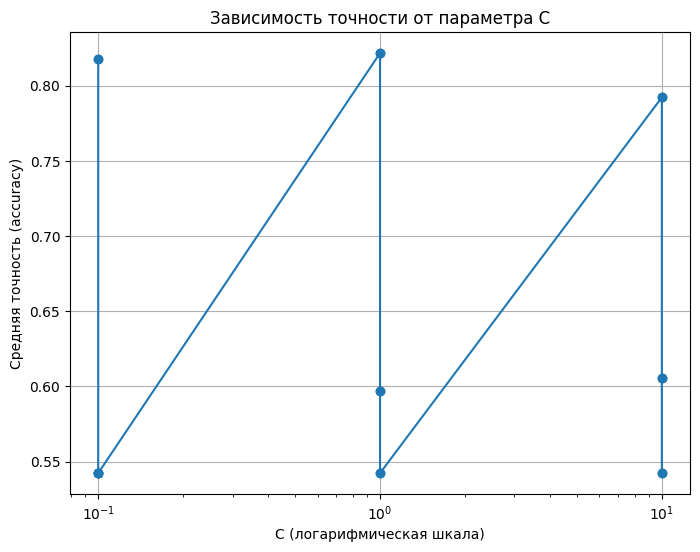

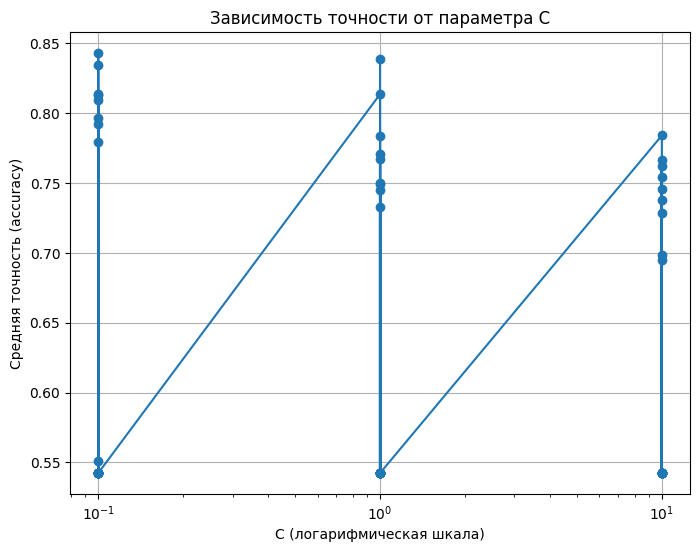

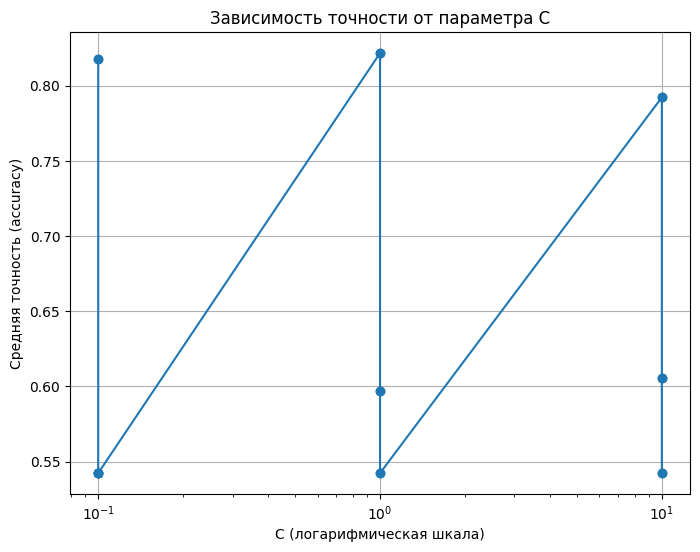

In [212]:
plot_for_svm(grid_search1)
plot_for_svm(grid_search2)
plot_for_svm(grid_search3)
plot_for_svm(grid_search4)
plot_for_svm(grid_search5)

Kfold

In [213]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [214]:
grid_search1 = GridSearchCV(clone(pipeline_linear), param_grid_linear, cv=kf, scoring='accuracy')
grid_search2 = GridSearchCV(clone(pipeline_poly), param_grid_poly, cv=kf, scoring='accuracy')
grid_search3 = GridSearchCV(clone(pipeline_rbf), param_grid_rbf, cv=kf, scoring='accuracy')
grid_search4 = GridSearchCV(clone(pipeline_sigmoid), param_grid_sigmoid, cv=kf, scoring='accuracy')
grid_search5 = GridSearchCV(clone(pipeline_exponential), param_grid_exponential, cv=kf, scoring='accuracy')

In [215]:
grid_search1.fit(X_multi, y_multi)
grid_search2.fit(X_multi, y_multi)
grid_search3.fit(X_multi, y_multi)
grid_search4.fit(X_multi, y_multi)
grid_search5.fit(X_multi, y_multi)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC(probability=True))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': [0.1, 1, 10],
                         'scaler__with_mean': [True, False]},
             scoring='accuracy')

In [216]:
print("Лучшие параметры:", grid_search1.best_params_)
print("Лучший скор на кросс-валидации:", grid_search1.best_score_)
print("Лучшие параметры:", grid_search2.best_params_)
print("Лучший скор на кросс-валидации:", grid_search2.best_score_)
print("Лучшие параметры:", grid_search3.best_params_)
print("Лучший скор на кросс-валидации:", grid_search3.best_score_)
print("Лучшие параметры:", grid_search4.best_params_)
print("Лучший скор на кросс-валидации:", grid_search4.best_score_)
print("Лучшие параметры:", grid_search5.best_params_)
print("Лучший скор на кросс-валидации:", grid_search5.best_score_)

Лучшие параметры: {'classifier__C': 0.1, 'scaler__with_mean': True}
Лучший скор на кросс-валидации: 0.5876271186440678
Лучшие параметры: {'classifier__C': 0.1, 'classifier__coef0': 2, 'classifier__degree': 3, 'scaler__with_mean': True}
Лучший скор на кросс-валидации: 0.6180790960451977
Лучшие параметры: {'classifier__C': 1, 'classifier__gamma': 0.1, 'scaler__with_mean': True}
Лучший скор на кросс-валидации: 0.5843502824858757
Лучшие параметры: {'classifier__C': 1, 'classifier__coef0': 1, 'classifier__gamma': 0.1, 'scaler__with_mean': True}
Лучший скор на кросс-валидации: 0.6112994350282486
Лучшие параметры: {'classifier__C': 1, 'classifier__gamma': 0.1, 'scaler__with_mean': True}
Лучший скор на кросс-валидации: 0.5843502824858757


In [217]:
y_pred1 = cross_val_predict(grid_search1.best_estimator_, X_multi, y_multi, cv=kf)
y_pred2 = cross_val_predict(grid_search2.best_estimator_, X_multi, y_multi, cv=kf)
y_pred3 = cross_val_predict(grid_search3.best_estimator_, X_multi, y_multi, cv=kf)
y_pred4 = cross_val_predict(grid_search4.best_estimator_, X_multi, y_multi, cv=kf)
y_pred5 = cross_val_predict(grid_search5.best_estimator_, X_multi, y_multi, cv=kf)

In [218]:
sk_learn_metrics_multi(y_multi, y_pred1)
self_made_metrics_multi(y_multi, y_pred1)
sk_learn_metrics_multi(y_multi, y_pred2)
self_made_metrics_multi(y_multi, y_pred2)
sk_learn_metrics_multi(y_multi, y_pred3)
self_made_metrics_multi(y_multi, y_pred3)
sk_learn_metrics_multi(y_multi, y_pred4)
self_made_metrics_multi(y_multi, y_pred4)
sk_learn_metrics_multi(y_multi, y_pred5)
self_made_metrics_multi(y_multi, y_pred5)

[0.9125     0.23636364 0.20588235 0.22857143 0.        ]
[0.84149856 0.26       0.21538462 0.23529412 0.        ]
[0.78074866 0.28888889 0.22580645 0.24242424 0.        ]
[[146, 9, 5, 0, 0], [29, 13, 4, 9, 0], [7, 8, 7, 12, 0], [3, 11, 13, 8, 0], [2, 4, 2, 4, 0]]
accuracy: 0.5878378378378378
precision: {0: np.float64(0.7807486631016043), 1: np.float64(0.28888888888888886), 2: np.float64(0.22580645161290322), 3: np.float64(0.24242424242424243), 4: 0}
recall: {0: np.float64(0.9125), 1: np.float64(0.23636363636363636), 2: np.float64(0.20588235294117646), 3: np.float64(0.22857142857142856), 4: np.float64(0.0)}
f1 score: {0: np.float64(0.8414985590778097), 1: np.float64(0.26), 2: np.float64(0.2153846153846154), 3: np.float64(0.23529411764705885), 4: 0}
[0.925      0.27272727 0.26470588 0.31428571 0.        ]
[0.84813754 0.29126214 0.3        0.34375    0.        ]
[0.78306878 0.3125     0.34615385 0.37931034 0.        ]
[[148, 8, 3, 0, 1], [28, 15, 3, 8, 1], [8, 10, 9, 6, 1], [4, 10, 9, 11,

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [219]:
print(classification_report(y_multi, y_pred1))
print(classification_report(y_multi, y_pred2))
print(classification_report(y_multi, y_pred3))
print(classification_report(y_multi, y_pred4))
print(classification_report(y_multi, y_pred5))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       160
           1       0.29      0.24      0.26        55
           2       0.23      0.21      0.22        34
           3       0.24      0.23      0.24        35
           4       0.00      0.00      0.00        12

    accuracy                           0.59       296
   macro avg       0.31      0.32      0.31       296
weighted avg       0.53      0.59      0.56       296

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       160
           1       0.31      0.27      0.29        55
           2       0.35      0.26      0.30        34
           3       0.38      0.31      0.34        35
           4       0.00      0.00      0.00        12

    accuracy                           0.62       296
   macro avg       0.36      0.36      0.36       296
weighted avg       0.57      0.62      0.59       296

              precisio

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [220]:
print(confusion_matrix(y_multi, y_pred1))
print(confusion_matrix(y_multi, y_pred2))
print(confusion_matrix(y_multi, y_pred3))
print(confusion_matrix(y_multi, y_pred4))
print(confusion_matrix(y_multi, y_pred5))

[[146   9   5   0   0]
 [ 29  13   4   9   0]
 [  7   8   7  12   0]
 [  3  11  13   8   0]
 [  2   4   2   4   0]]
[[148   8   3   0   1]
 [ 28  15   3   8   1]
 [  8  10   9   6   1]
 [  4  10   9  11   1]
 [  1   5   2   4   0]]
[[150   7   2   1   0]
 [ 29  14   6   6   0]
 [ 10  15   3   6   0]
 [  7  14   8   6   0]
 [  3   4   3   2   0]]
[[143  10   4   3   0]
 [ 26  17   5   7   0]
 [  3  12   8  11   0]
 [  6   9   7  13   0]
 [  2   2   2   6   0]]
[[150   7   2   1   0]
 [ 29  14   6   6   0]
 [ 10  15   3   6   0]
 [  7  14   8   6   0]
 [  3   4   3   2   0]]


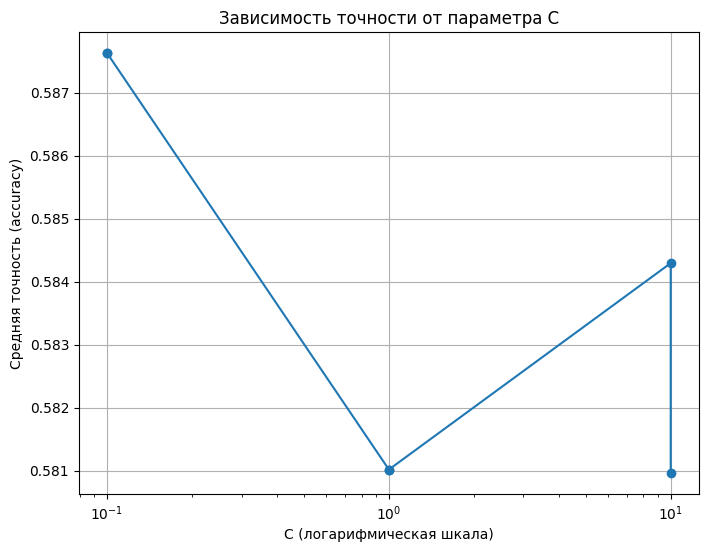

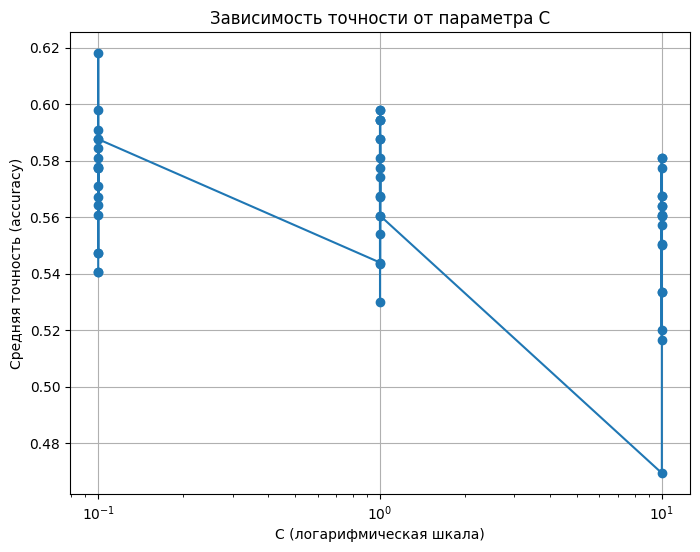

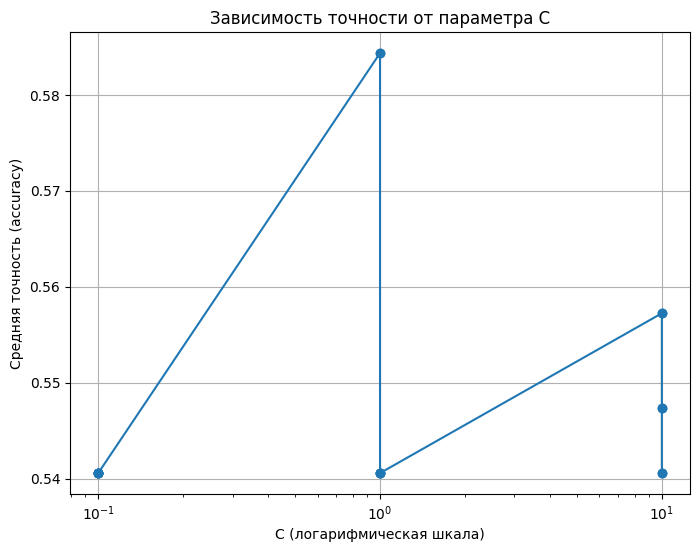

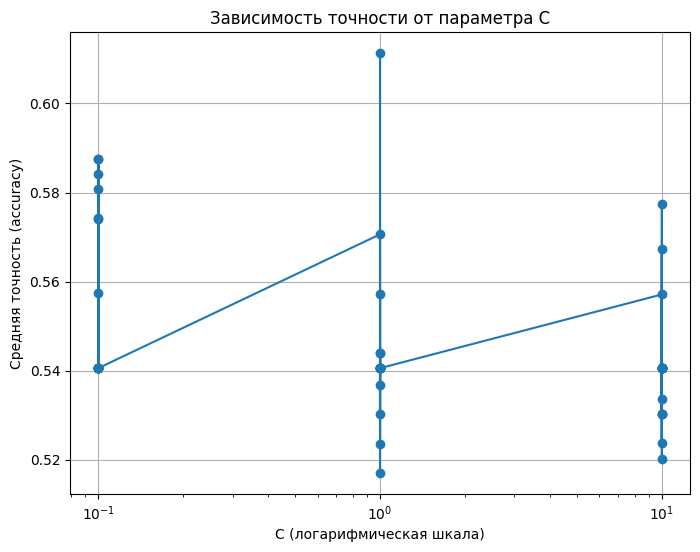

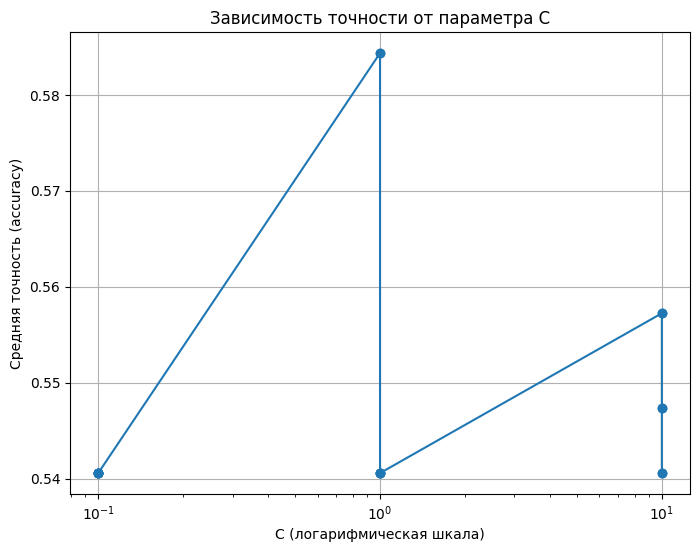

In [221]:
plot_for_svm(grid_search1)
plot_for_svm(grid_search2)
plot_for_svm(grid_search3)
plot_for_svm(grid_search4)
plot_for_svm(grid_search5)

In [222]:
grid_search1 = GridSearchCV(clone(pipeline_linear), param_grid_linear, cv=kf, scoring='accuracy')
grid_search2 = GridSearchCV(clone(pipeline_poly), param_grid_poly, cv=kf, scoring='accuracy')
grid_search3 = GridSearchCV(clone(pipeline_rbf), param_grid_rbf, cv=kf, scoring='accuracy')
grid_search4 = GridSearchCV(clone(pipeline_sigmoid), param_grid_sigmoid, cv=kf, scoring='accuracy')
grid_search5 = GridSearchCV(clone(pipeline_exponential), param_grid_exponential, cv=kf, scoring='accuracy')

In [223]:
grid_search1.fit(X_multi_bin, y_multi_bin)
grid_search2.fit(X_multi_bin, y_multi_bin)
grid_search3.fit(X_multi_bin, y_multi_bin)
grid_search4.fit(X_multi_bin, y_multi_bin)
grid_search5.fit(X_multi_bin, y_multi_bin)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC(probability=True))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': [0.1, 1, 10],
                         'scaler__with_mean': [True, False]},
             scoring='accuracy')

In [224]:
print("Лучшие параметры:", grid_search1.best_params_)
print("Лучший скор на кросс-валидации:", grid_search1.best_score_)
print("Лучшие параметры:", grid_search2.best_params_)
print("Лучший скор на кросс-валидации:", grid_search2.best_score_)
print("Лучшие параметры:", grid_search3.best_params_)
print("Лучший скор на кросс-валидации:", grid_search3.best_score_)
print("Лучшие параметры:", grid_search4.best_params_)
print("Лучший скор на кросс-валидации:", grid_search4.best_score_)
print("Лучшие параметры:", grid_search5.best_params_)
print("Лучший скор на кросс-валидации:", grid_search5.best_score_)

Лучшие параметры: {'classifier__C': 0.1, 'scaler__with_mean': True}
Лучший скор на кросс-валидации: 0.8307909604519775
Лучшие параметры: {'classifier__C': 1, 'classifier__coef0': 0, 'classifier__degree': 2, 'scaler__with_mean': False}
Лучший скор на кросс-валидации: 0.8477401129943504
Лучшие параметры: {'classifier__C': 1, 'classifier__gamma': 0.1, 'scaler__with_mean': True}
Лучший скор на кросс-валидации: 0.8240677966101695
Лучшие параметры: {'classifier__C': 0.1, 'classifier__coef0': 0, 'classifier__gamma': 0.1, 'scaler__with_mean': True}
Лучший скор на кросс-валидации: 0.8443502824858757
Лучшие параметры: {'classifier__C': 1, 'classifier__gamma': 0.1, 'scaler__with_mean': True}
Лучший скор на кросс-валидации: 0.8240677966101695


In [225]:
y_pred1, y_pred1_proba = cross_val_predict(grid_search1.best_estimator_, X_multi_bin, y_multi_bin, cv=kf), cross_val_predict(grid_search1.best_estimator_, X_multi_bin, y_multi_bin, cv=kf, method='predict_proba')[:,1]
y_pred2, y_pred2_proba = cross_val_predict(grid_search2.best_estimator_, X_multi_bin, y_multi_bin, cv=kf), cross_val_predict(grid_search2.best_estimator_, X_multi_bin, y_multi_bin, cv=kf, method='predict_proba')[:,1]
y_pred3, y_pred3_proba = cross_val_predict(grid_search3.best_estimator_, X_multi_bin, y_multi_bin, cv=kf), cross_val_predict(grid_search3.best_estimator_, X_multi_bin, y_multi_bin, cv=kf, method='predict_proba')[:,1]
y_pred4, y_pred4_proba = cross_val_predict(grid_search4.best_estimator_, X_multi_bin, y_multi_bin, cv=kf), cross_val_predict(grid_search4.best_estimator_, X_multi_bin, y_multi_bin, cv=kf, method='predict_proba')[:,1]
y_pred5, y_pred5_proba = cross_val_predict(grid_search5.best_estimator_, X_multi_bin, y_multi_bin, cv=kf), cross_val_predict(grid_search5.best_estimator_, X_multi_bin, y_multi_bin, cv=kf, method='predict_proba')[:,1]

In [226]:
sk_learn_metrics_binary(y_multi_bin, y_pred1)
self_made_metrics_binary(y_multi_bin, y_pred1)
sk_learn_metrics_binary(y_multi_bin, y_pred2)
self_made_metrics_binary(y_multi_bin, y_pred2)
sk_learn_metrics_binary(y_multi_bin, y_pred3)
self_made_metrics_binary(y_multi_bin, y_pred3)
sk_learn_metrics_binary(y_multi_bin, y_pred4)
self_made_metrics_binary(y_multi_bin, y_pred4)
sk_learn_metrics_binary(y_multi_bin, y_pred5)
self_made_metrics_binary(y_multi_bin, y_pred5)

0.7720588235294118
0.8076923076923077
0.8467741935483871
[[141, 19], [31, 105]]
accuracy: 0.831081081081081
precision: 0.8467741935483871
recall: 0.7720588235294118
f1 score: 0.8076923076923077
0.7867647058823529
0.8262548262548263
0.8699186991869918
[[144, 16], [29, 107]]
accuracy: 0.847972972972973
precision: 0.8699186991869918
recall: 0.7867647058823529
f1 score: 0.8262548262548262
0.7941176470588235
0.8059701492537313
0.8181818181818182
[[136, 24], [28, 108]]
accuracy: 0.8243243243243243
precision: 0.8181818181818182
recall: 0.7941176470588235
f1 score: 0.8059701492537314
0.7867647058823529
0.823076923076923
0.8629032258064516
[[143, 17], [29, 107]]
accuracy: 0.8445945945945946
precision: 0.8629032258064516
recall: 0.7867647058823529
f1 score: 0.823076923076923
0.7941176470588235
0.8059701492537313
0.8181818181818182
[[136, 24], [28, 108]]
accuracy: 0.8243243243243243
precision: 0.8181818181818182
recall: 0.7941176470588235
f1 score: 0.8059701492537314


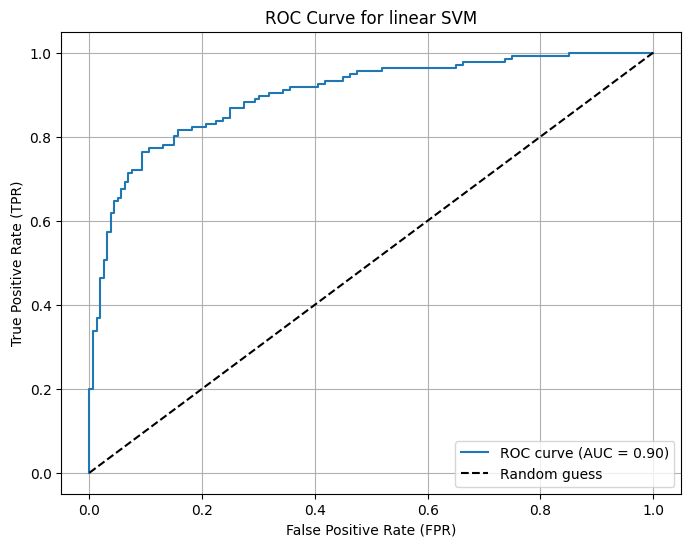

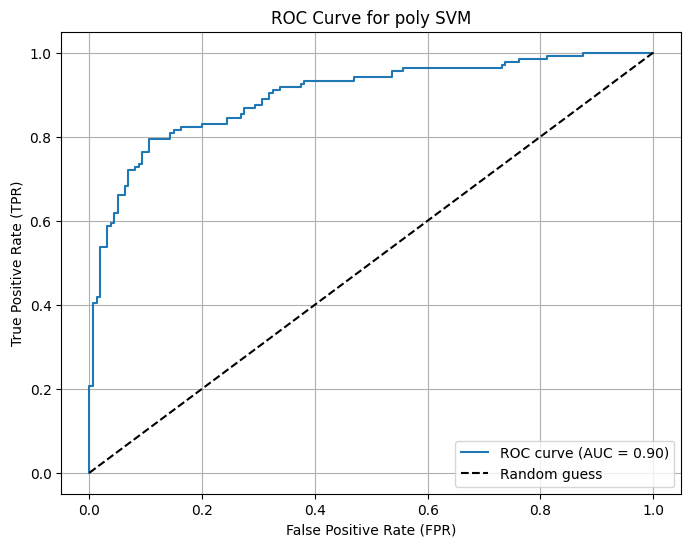

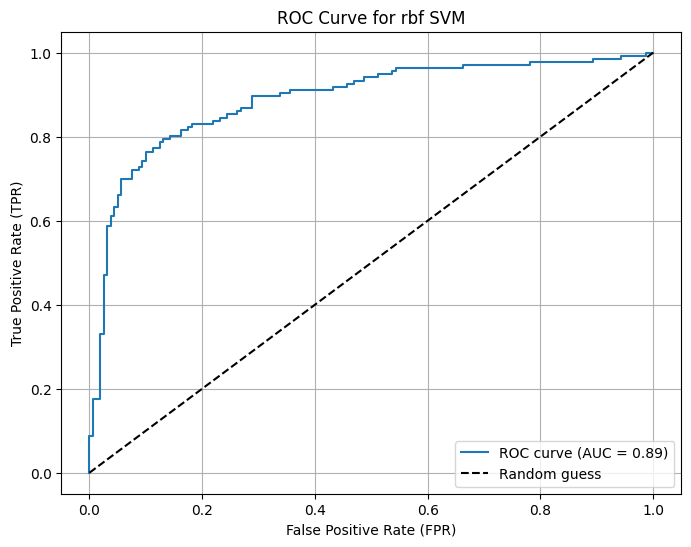

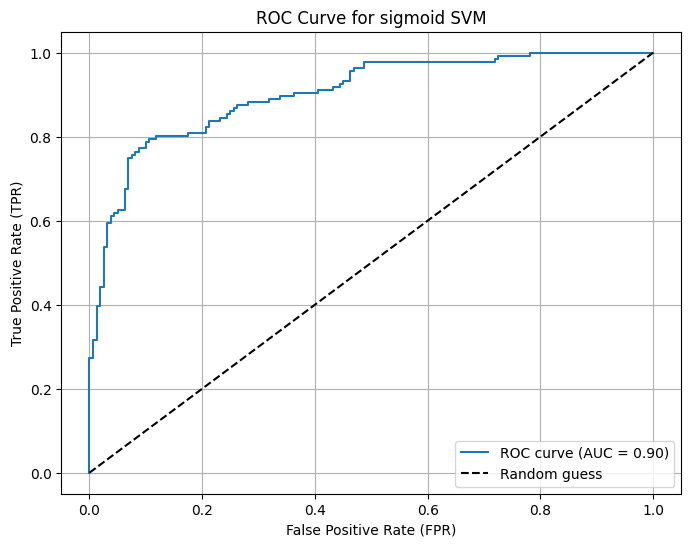

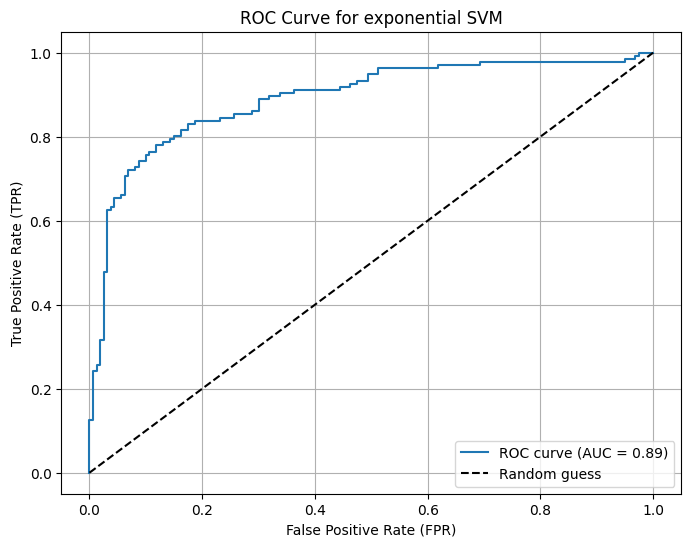

In [227]:
roc_curve_method(y_multi_bin, y_pred1_proba, "linear SVM")
roc_curve_method(y_multi_bin, y_pred2_proba, "poly SVM")
roc_curve_method(y_multi_bin, y_pred3_proba, "rbf SVM")
roc_curve_method(y_multi_bin, y_pred4_proba, "sigmoid SVM")
roc_curve_method(y_multi_bin, y_pred5_proba, "exponential SVM")

In [228]:
print(classification_report(y_multi_bin, y_pred1))
print(classification_report(y_multi_bin, y_pred2))
print(classification_report(y_multi_bin, y_pred3))
print(classification_report(y_multi_bin, y_pred4))
print(classification_report(y_multi_bin, y_pred5))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       160
           1       0.85      0.77      0.81       136

    accuracy                           0.83       296
   macro avg       0.83      0.83      0.83       296
weighted avg       0.83      0.83      0.83       296

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       160
           1       0.87      0.79      0.83       136

    accuracy                           0.85       296
   macro avg       0.85      0.84      0.85       296
weighted avg       0.85      0.85      0.85       296

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       160
           1       0.82      0.79      0.81       136

    accuracy                           0.82       296
   macro avg       0.82      0.82      0.82       296
weighted avg       0.82      0.82      0.82       296

              preci

In [229]:
print(confusion_matrix(y_multi_bin, y_pred1))
print(confusion_matrix(y_multi_bin, y_pred2))
print(confusion_matrix(y_multi_bin, y_pred3))
print(confusion_matrix(y_multi_bin, y_pred4))
print(confusion_matrix(y_multi_bin, y_pred5))

[[141  19]
 [ 31 105]]
[[144  16]
 [ 29 107]]
[[136  24]
 [ 28 108]]
[[143  17]
 [ 29 107]]
[[136  24]
 [ 28 108]]


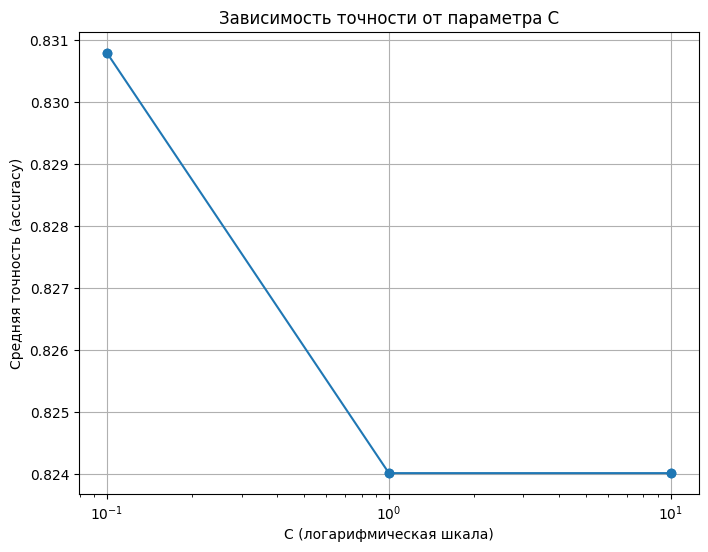

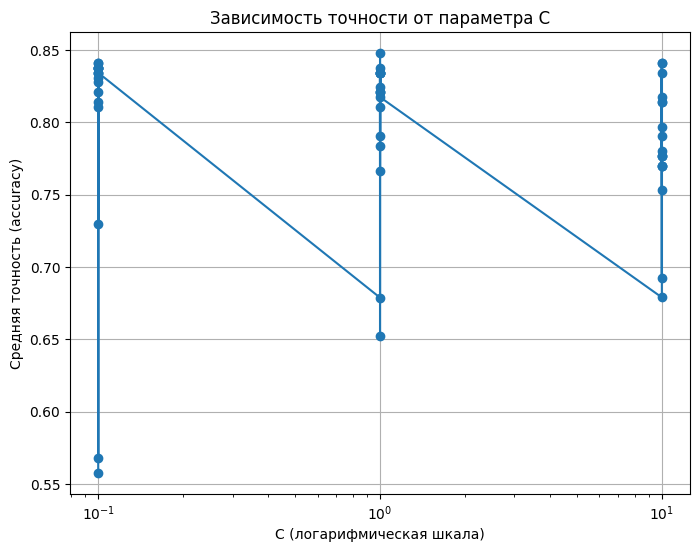

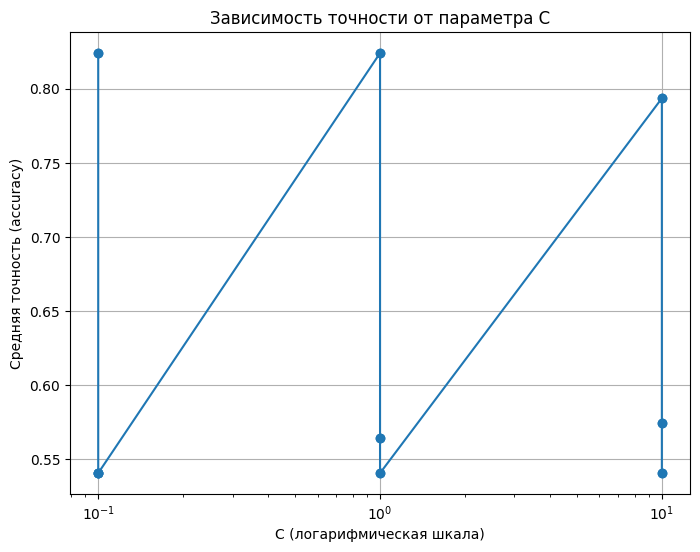

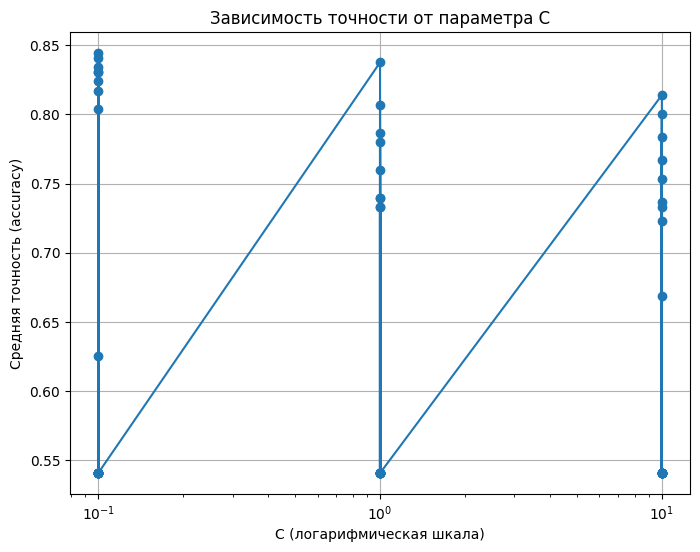

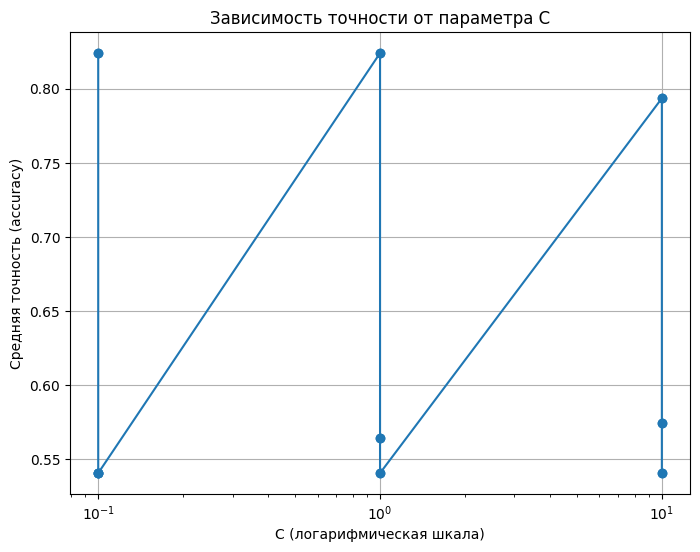

In [230]:
plot_for_svm(grid_search1)
plot_for_svm(grid_search2)
plot_for_svm(grid_search3)
plot_for_svm(grid_search4)
plot_for_svm(grid_search5)

Наилучшие модели для каждого из "типов" исходных данных. Для того чтобы не нагромождать исследование, воспользуемся SMOTE (transformed_X/y_train). При этом воспользуемся как мультиклассовым, так и бинарным вариантами.

Мультиклассовый

In [231]:
classifiers = {
    'KNN classifier': KNeighborsClassifier(metric="manhattan", n_neighbors=5),
    'Log Regr L2': LogisticRegression(C=0.01, max_iter=100, penalty="l2", solver="lbfgs"),
    'Log Regr L1': LogisticRegression(C=1.0, max_iter=100, penalty="l1", solver="saga"),
    'Log Regr ElasticNet': LogisticRegression(C=0.1, l1_ratio=0.5, max_iter=100, penalty="elasticnet", solver="saga"),
    'GaussianNB' : GaussianNB(var_smoothing=1e-06),
    'MultinomialNB': MultinomialNB(alpha=0.1, fit_prior=True),
    'linear SVC' : SVC(kernel='linear', C=0.1),
    'poly SVC': SVC(kernel='poly', C=1, coef0=0, degree=2),
    'rbf SVC': SVC(kernel='rbf', C=1, gamma=0.1),
    'sigmoid SVC': SVC(kernel='sigmoid', C=0.1, coef0=0, gamma=0.1)
}

In [232]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    if("SVC" in name or "Log Regr" in name):
        scaler = StandardScaler()
        tr_X_train = scaler.fit_transform(transformed_X_train)
        tr_X_test = scaler.transform(X_test)
    else:
        tr_X_train = transformed_X_train
        tr_X_test = X_test
    classifier.fit(tr_X_train, transformed_y_train)

    y_pred = classifier.predict(tr_X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))

Accuracy (train) for KNN classifier: 60.0% 
              precision    recall  f1-score   support

           0       0.89      0.53      0.67        32
           1       0.47      0.73      0.57        11
           2       0.44      0.57      0.50         7
           3       0.62      0.71      0.67         7
           4       0.29      0.67      0.40         3

    accuracy                           0.60        60
   macro avg       0.54      0.64      0.56        60
weighted avg       0.70      0.60      0.62        60

Accuracy (train) for Log Regr L2: 56.7% 
              precision    recall  f1-score   support

           0       0.96      0.69      0.80        32
           1       0.43      0.55      0.48        11
           2       0.00      0.00      0.00         7
           3       0.38      0.71      0.50         7
           4       0.20      0.33      0.25         3

    accuracy                           0.57        60
   macro avg       0.39      0.46      0.41   

Бинарный

In [233]:
classifiers = {
    'KNN classifier': KNeighborsClassifier(metric="manhattan", n_neighbors=5),
    'Log Regr L2': LogisticRegression(C=0.01, max_iter=100, penalty="l2", solver="lbfgs"),
    'Log Regr L1': LogisticRegression(C=0.1, max_iter=100, penalty="l1", solver="liblinear"),
    'Log Regr ElasticNet': LogisticRegression(C=0.1, l1_ratio=0.1, max_iter=100, penalty="elasticnet", solver="saga"),
    'GaussianNB' : GaussianNB(var_smoothing=1e-09),
    'MultinomialNB': MultinomialNB(alpha=1.0, fit_prior=False),
    'BernoulliNB': BernoulliNB(alpha=0.1, fit_prior=False),
    'linear SVC' : SVC(kernel='linear', C=1),
    'poly SVC': SVC(kernel='poly', C=0.1, coef0=1, degree=2),
    'rbf SVC': SVC(kernel='rbf', C=1, gamma=0.1),
    'sigmoid SVC': SVC(kernel='sigmoid', C=0.1, coef0=0, gamma=0.1)
}

In [234]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    if("SVC" in name or "Log Regr" in name):
        scaler = StandardScaler()
        tr_X_train = scaler.fit_transform(transformed_X_train_bin)
        tr_X_test = scaler.transform(X_test_bin)
    else:
        tr_X_train = transformed_X_train_bin
        tr_X_test = X_test_bin
    classifier.fit(tr_X_train, transformed_y_train_bin)

    y_pred = classifier.predict(tr_X_test)
    accuracy = accuracy_score(y_test_bin, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test_bin,y_pred))

Accuracy (train) for KNN classifier: 80.0% 
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        32
           1       0.72      0.93      0.81        28

    accuracy                           0.80        60
   macro avg       0.82      0.81      0.80        60
weighted avg       0.83      0.80      0.80        60

Accuracy (train) for Log Regr L2: 86.7% 
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       0.83      0.89      0.86        28

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60

Accuracy (train) for Log Regr L1: 91.7% 
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.90      0.93      0.91        28

    accuracy                           0.92        60
  

Реализация kNN.

In [235]:
from kNN import kNNClassifier

In [236]:
classifier = kNNClassifier(5, "manhattan")
classifier.fit(transformed_X_train, transformed_y_train)
y_pred = classifier.predict(X_test)
sk_learn_metrics_multi(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[0.53125    0.72727273 0.57142857 0.71428571 0.66666667]
[0.66666667 0.61538462 0.47058824 0.625      0.4       ]
[0.89473684 0.53333333 0.4        0.55555556 0.28571429]
              precision    recall  f1-score   support

           0       0.89      0.53      0.67        32
           1       0.53      0.73      0.62        11
           2       0.40      0.57      0.47         7
           3       0.56      0.71      0.62         7
           4       0.29      0.67      0.40         3

    accuracy                           0.60        60
   macro avg       0.53      0.64      0.56        60
weighted avg       0.70      0.60      0.62        60

[[17  5  4  2  4]
 [ 2  8  0  1  0]
 [ 0  1  4  1  1]
 [ 0  0  2  5  0]
 [ 0  1  0  0  2]]


In [237]:
classifier = kNNClassifier(5, "euclidean")
classifier.fit(transformed_X_train, transformed_y_train)
y_pred = classifier.predict(X_test)
sk_learn_metrics_multi(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[0.5625     0.81818182 0.57142857 0.71428571 0.66666667]
[0.70588235 0.69230769 0.57142857 0.58823529 0.33333333]
[0.94736842 0.6        0.57142857 0.5        0.22222222]
              precision    recall  f1-score   support

           0       0.95      0.56      0.71        32
           1       0.60      0.82      0.69        11
           2       0.57      0.57      0.57         7
           3       0.50      0.71      0.59         7
           4       0.22      0.67      0.33         3

    accuracy                           0.63        60
   macro avg       0.57      0.67      0.58        60
weighted avg       0.75      0.63      0.66        60

[[18  4  2  2  6]
 [ 1  9  0  1  0]
 [ 0  1  4  1  1]
 [ 0  1  1  5  0]
 [ 0  0  0  1  2]]


In [238]:
classifier = kNNClassifier(5, "manhattan")
classifier.fit(transformed_X_train_bin, transformed_y_train_bin)
y_pred = classifier.predict(X_test_bin)
sk_learn_metrics_binary(y_test_bin, y_pred)
print(classification_report(y_test_bin, y_pred))
print(confusion_matrix(y_test_bin, y_pred))

0.9285714285714286
0.8125
0.7222222222222222
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        32
           1       0.72      0.93      0.81        28

    accuracy                           0.80        60
   macro avg       0.82      0.81      0.80        60
weighted avg       0.83      0.80      0.80        60

[[22 10]
 [ 2 26]]


In [239]:
classifier = kNNClassifier(5, "euclidean")
classifier.fit(transformed_X_train_bin, transformed_y_train_bin)
y_pred = classifier.predict(X_test_bin)
sk_learn_metrics_binary(y_test_bin, y_pred)
print(classification_report(y_test_bin, y_pred))
print(confusion_matrix(y_test_bin, y_pred))

0.8571428571428571
0.7868852459016393
0.7272727272727273
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        32
           1       0.73      0.86      0.79        28

    accuracy                           0.78        60
   macro avg       0.79      0.79      0.78        60
weighted avg       0.79      0.78      0.78        60

[[23  9]
 [ 4 24]]
